# Data analysis and Machine learning

The previous part we used beautiful soup to collect data from SGCarMart, take note we only focused on used cars in SGCarMart. Now for the exciting part we will used all the variables collected to do a prediction on used car price.

This section is splited into 3 parts 

## 1) Data Cleaning

We will try our best to convert our structured datasets into numeric data, as the problem or question that we are engaging is a How Much / How Many? type (in this is case, how Much). We will most likely be using Numeric prediction to answer the question of How much should a used car in Singapore cost, base on different predictors. 


## 2) Exploratory Data Analysis 

This part we would like to visualise the correlation of different predictors, frequecy of certain type of cars or car brand, etc. 


## 3) Machine learning

In this portion we will use different models to predict used car price, we will compare the models base on their accuracy and try to also makes sense of what the model is doing and understand why is it performing better or worst than other models.








In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from datetime import date
sb.set()

from sklearn import preprocessing
standardize = preprocessing.StandardScaler()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 2.0, 3.0])
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 2.0, 3.0], max_iter = 1000)
linreg = LinearRegression()

In [2]:
def coe_converter(str1):
    # Convert days_of_coe_left_yy_mm_dd to days    
    year_index = str1.find('yr')
    if year_index == -1:
        year = 0
    else:
        year = int(str1[year_index-1])

        
    mth_index = str1.find('mth')
    if mth_index == -1:
        mth = 0
    else:
        mth = int(str1[mth_index-1])

        
    day_index = str1.find('day')
    if day_index == -1:
        day = 0
    else:
        day = int(str1[day_index-1])
       
    days_of_coe_left = (year * 365) + (mth * 30) + day 
    return days_of_coe_left

def age_months(value):
    value = datetime.datetime.strptime(value, '%d-%b-%Y').date()
    today = datetime.datetime.today()
    value = date(value.year, value.month, value.day)
    today = date(today.year, today.month, today.day)
    day = today - value
    return day.days

Read CSV file from the 4k plus data set which we collected, we will skip data with more than 18 dimensions


In [3]:
df = pd.read_csv('sg_usedcar_data_4k.csv', error_bad_lines = False)

b'Skipping line 325: expected 18 fields, saw 19\nSkipping line 328: expected 18 fields, saw 19\nSkipping line 354: expected 18 fields, saw 19\nSkipping line 418: expected 18 fields, saw 19\nSkipping line 422: expected 18 fields, saw 19\nSkipping line 1133: expected 18 fields, saw 19\nSkipping line 1325: expected 18 fields, saw 19\nSkipping line 1625: expected 18 fields, saw 19\nSkipping line 1655: expected 18 fields, saw 19\nSkipping line 2230: expected 18 fields, saw 19\nSkipping line 2300: expected 18 fields, saw 19\nSkipping line 2329: expected 18 fields, saw 19\nSkipping line 3107: expected 18 fields, saw 19\nSkipping line 3123: expected 18 fields, saw 19\nSkipping line 3246: expected 18 fields, saw 19\nSkipping line 3799: expected 18 fields, saw 19\nSkipping line 4095: expected 18 fields, saw 19\nSkipping line 4098: expected 18 fields, saw 19\nSkipping line 4281: expected 18 fields, saw 19\nSkipping line 4287: expected 18 fields, saw 19\n'


In [4]:
df.head()


,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price
0,Renault,Hatchback,04-Jul-2019,9yrs 3mths 15days COE left),8780,4500,1148,35770,26659,1461,1501,2019,Auto,23315,14641,81,1,88999
1,Kia,Hatchback,25-Aug-2011,1yr 5mths 6days COE left),N.A,N.A,738,N.A,48801,1591,1261,2011,Auto,12570,12570,91,3,N.A
2,BMW,MPV,24-Oct-2019,9yrs 7mths 5days COE left),N.A,N.A,684,N.A,34001,1499,1490,2019,Auto,31966,36753,80,1,N.A
3,Toyota,MPV,25-Mar-2009,8yrs 10mths 13days COE left),N.A,N.A,269,N.A,31335,1794,1310,2009,Auto,18662,6663,97,1,N.A
4,BMW,MPV,24-Oct-2019,9yrs 7mths 5days COE left),N.A,N.A,684,N.A,34001,1499,1490,2019,Auto,31966,36753,80,1,N.A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 18 columns):
Brand            4370 non-null object
Type             4370 non-null object
Reg_date         4370 non-null object
Coe_left         4350 non-null object
Dep              4370 non-null object
Mileage          4370 non-null object
Road Tax         4370 non-null object
Dereg Value      4370 non-null object
COE              4370 non-null object
Engine Cap       4370 non-null object
Curb Weight      4370 non-null object
Manufactured     4370 non-null object
Transmission     4370 non-null object
OMV              4370 non-null object
ARF              4370 non-null object
Power            4370 non-null object
No. of Owners    4370 non-null object
Price            4370 non-null object
dtypes: object(18)
memory usage: 614.7+ KB


# Data Cleaning 

We have decided to drop all data which are missing. At first we thought about filling in data sets, however things like price, mileage, COE left, is not just something that we can fill in without any context, meaning to say adding mean, min or max values is not a very good choice and in fact it will mess up the data cleaning.


Our Goal now is to as much as possible convert everything to integer values and afterwards do a correlation check with different data sets.

In [6]:
for col in df:
    df[col] = df[col].apply(lambda x: np.nan if x == "N.A" or x == 'N.A.' else x) #convert 'N.A' data to nan

In [7]:
df = df.dropna(inplace = False)

In [8]:
df['Manufactured'] = df['Manufactured'].astype(int) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 4369
Data columns (total 18 columns):
Brand            1291 non-null object
Type             1291 non-null object
Reg_date         1291 non-null object
Coe_left         1291 non-null object
Dep              1291 non-null object
Mileage          1291 non-null object
Road Tax         1291 non-null object
Dereg Value      1291 non-null object
COE              1291 non-null object
Engine Cap       1291 non-null object
Curb Weight      1291 non-null object
Manufactured     1291 non-null int32
Transmission     1291 non-null object
OMV              1291 non-null object
ARF              1291 non-null object
Power            1291 non-null object
No. of Owners    1291 non-null object
Price            1291 non-null object
dtypes: int32(1), object(17)
memory usage: 186.6+ KB


In [10]:
dtime = pd.Series(df['Reg_date']) ## convert to date time object
dtime = dtime.apply(age_months)
dtime = pd.DataFrame(dtime)
df['Reg_date'] = dtime
df['Coe_left'] = df['Coe_left'].apply(coe_converter)
df['age'] = df['Manufactured'].sub(2020).mul(-1) # get the current age of the car, by subtracting today from the manufacturaing date
df['Manufactured'] = df['age']
df.drop('age', axis=1, inplace=True)
df.rename(columns={"Manufactured": "age"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 4369
Data columns (total 18 columns):
Brand            1291 non-null object
Type             1291 non-null object
Reg_date         1291 non-null int64
Coe_left         1291 non-null int64
Dep              1291 non-null object
Mileage          1291 non-null object
Road Tax         1291 non-null object
Dereg Value      1291 non-null object
COE              1291 non-null object
Engine Cap       1291 non-null object
Curb Weight      1291 non-null object
age              1291 non-null int32
Transmission     1291 non-null object
OMV              1291 non-null object
ARF              1291 non-null object
Power            1291 non-null object
No. of Owners    1291 non-null object
Price            1291 non-null object
dtypes: int32(1), int64(2), object(15)
memory usage: 186.6+ KB


In [11]:
df_main = df.apply(pd.to_numeric, errors = 'ignore')#convert all possible data sets to integer, ignore the ones which we cant changed to int


In [12]:
df_main['Transmission'] = df_main['Transmission'].apply(lambda x: 1 if x == 'Auto' else 0).astype(int)
df_main

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,age,Transmission,OMV,ARF,Power,No. of Owners,Price
0,Renault,Hatchback,286,3380,8780,4500,1148,35770,26659,1461,1501,1,1,23315,14641,81,1,88999
5,Volkswagen,Sports Car,1339,2317,10460,57100,620,51540,52503,1390,1245,4,1,22743,23841,90,1,79000
8,Honda,Stationwagon,1449,2228,8850,53444,682,33072,45000,1496,1130,5,1,17439,7439,97,3,57800
9,Honda,Stationwagon,481,3192,6630,13428,182,23215,15001,1496,1220,2,1,22445,13423,101,1,64800
11,Mercedes-Benz,SUV,1310,2345,16880,81000,1202,72323,56500,1991,1735,4,1,39668,47536,155,1,133300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,Toyota,Hatchback,229,3436,14710,5500,976,66386,38602,1798,1120,2,0,34180,39852,156,1,159000
4362,Honda,SUV,1419,2258,9030,66000,682,36449,47020,1496,1190,5,1,19780,9780,96,1,60800
4363,Toyota,Luxury Sedan,1596,2068,10750,95000,1210,55802,57501,1998,1480,5,1,27591,30628,123,1,76700
4366,Mazda,MPV,1142,2229,10470,48000,1210,51775,50621,1998,1664,4,1,21514,22120,111,1,83800


# Exploratory Data Analysis

Now that we have somewhat clean our data sets, dropping missing data and converting most datas to numerals for numerical analysis. We can now take do analysis of our data sets. Before we begin I would like to explain the predictors which are found in the data set. We have 16 predictors, 3 categorical and 13 numerical dataset. Lets explore these data.

## Categorical Data


### Brand

Or Car make e.g. Toyota, Ferrari etc. This is a categorical data and car make will influence car price significantly as Japanese cars tend to be cheaper and European cars are towards the higher price point. Brand and Type should be highly relatable especially brands that have a special niche, like Land Rover, i would expect that they have mostly SUV vehicles.

In [13]:
df_main["Brand"].value_counts()

Mercedes-Benz    214
Toyota           183
Honda            162
BMW              155
Audi              71
Mazda             62
Volkswagen        58
Hyundai           45
Nissan            41
Mitsubishi        38
Subaru            32
Volvo             27
Kia               27
Porsche           25
Lexus             20
Land              17
Maserati          15
Renault           12
MINI              10
Peugeot            9
Suzuki             9
Jaguar             9
Citroen            8
Ford               6
Lamborghini        6
Chevrolet          6
McLaren            4
Daihatsu           3
Ssangyong          3
Infiniti           3
Bentley            2
Opel               2
Lotus              2
Ferrari            1
Perodua            1
Aston              1
Rolls-Royce        1
SEAT               1
Name: Brand, dtype: int64

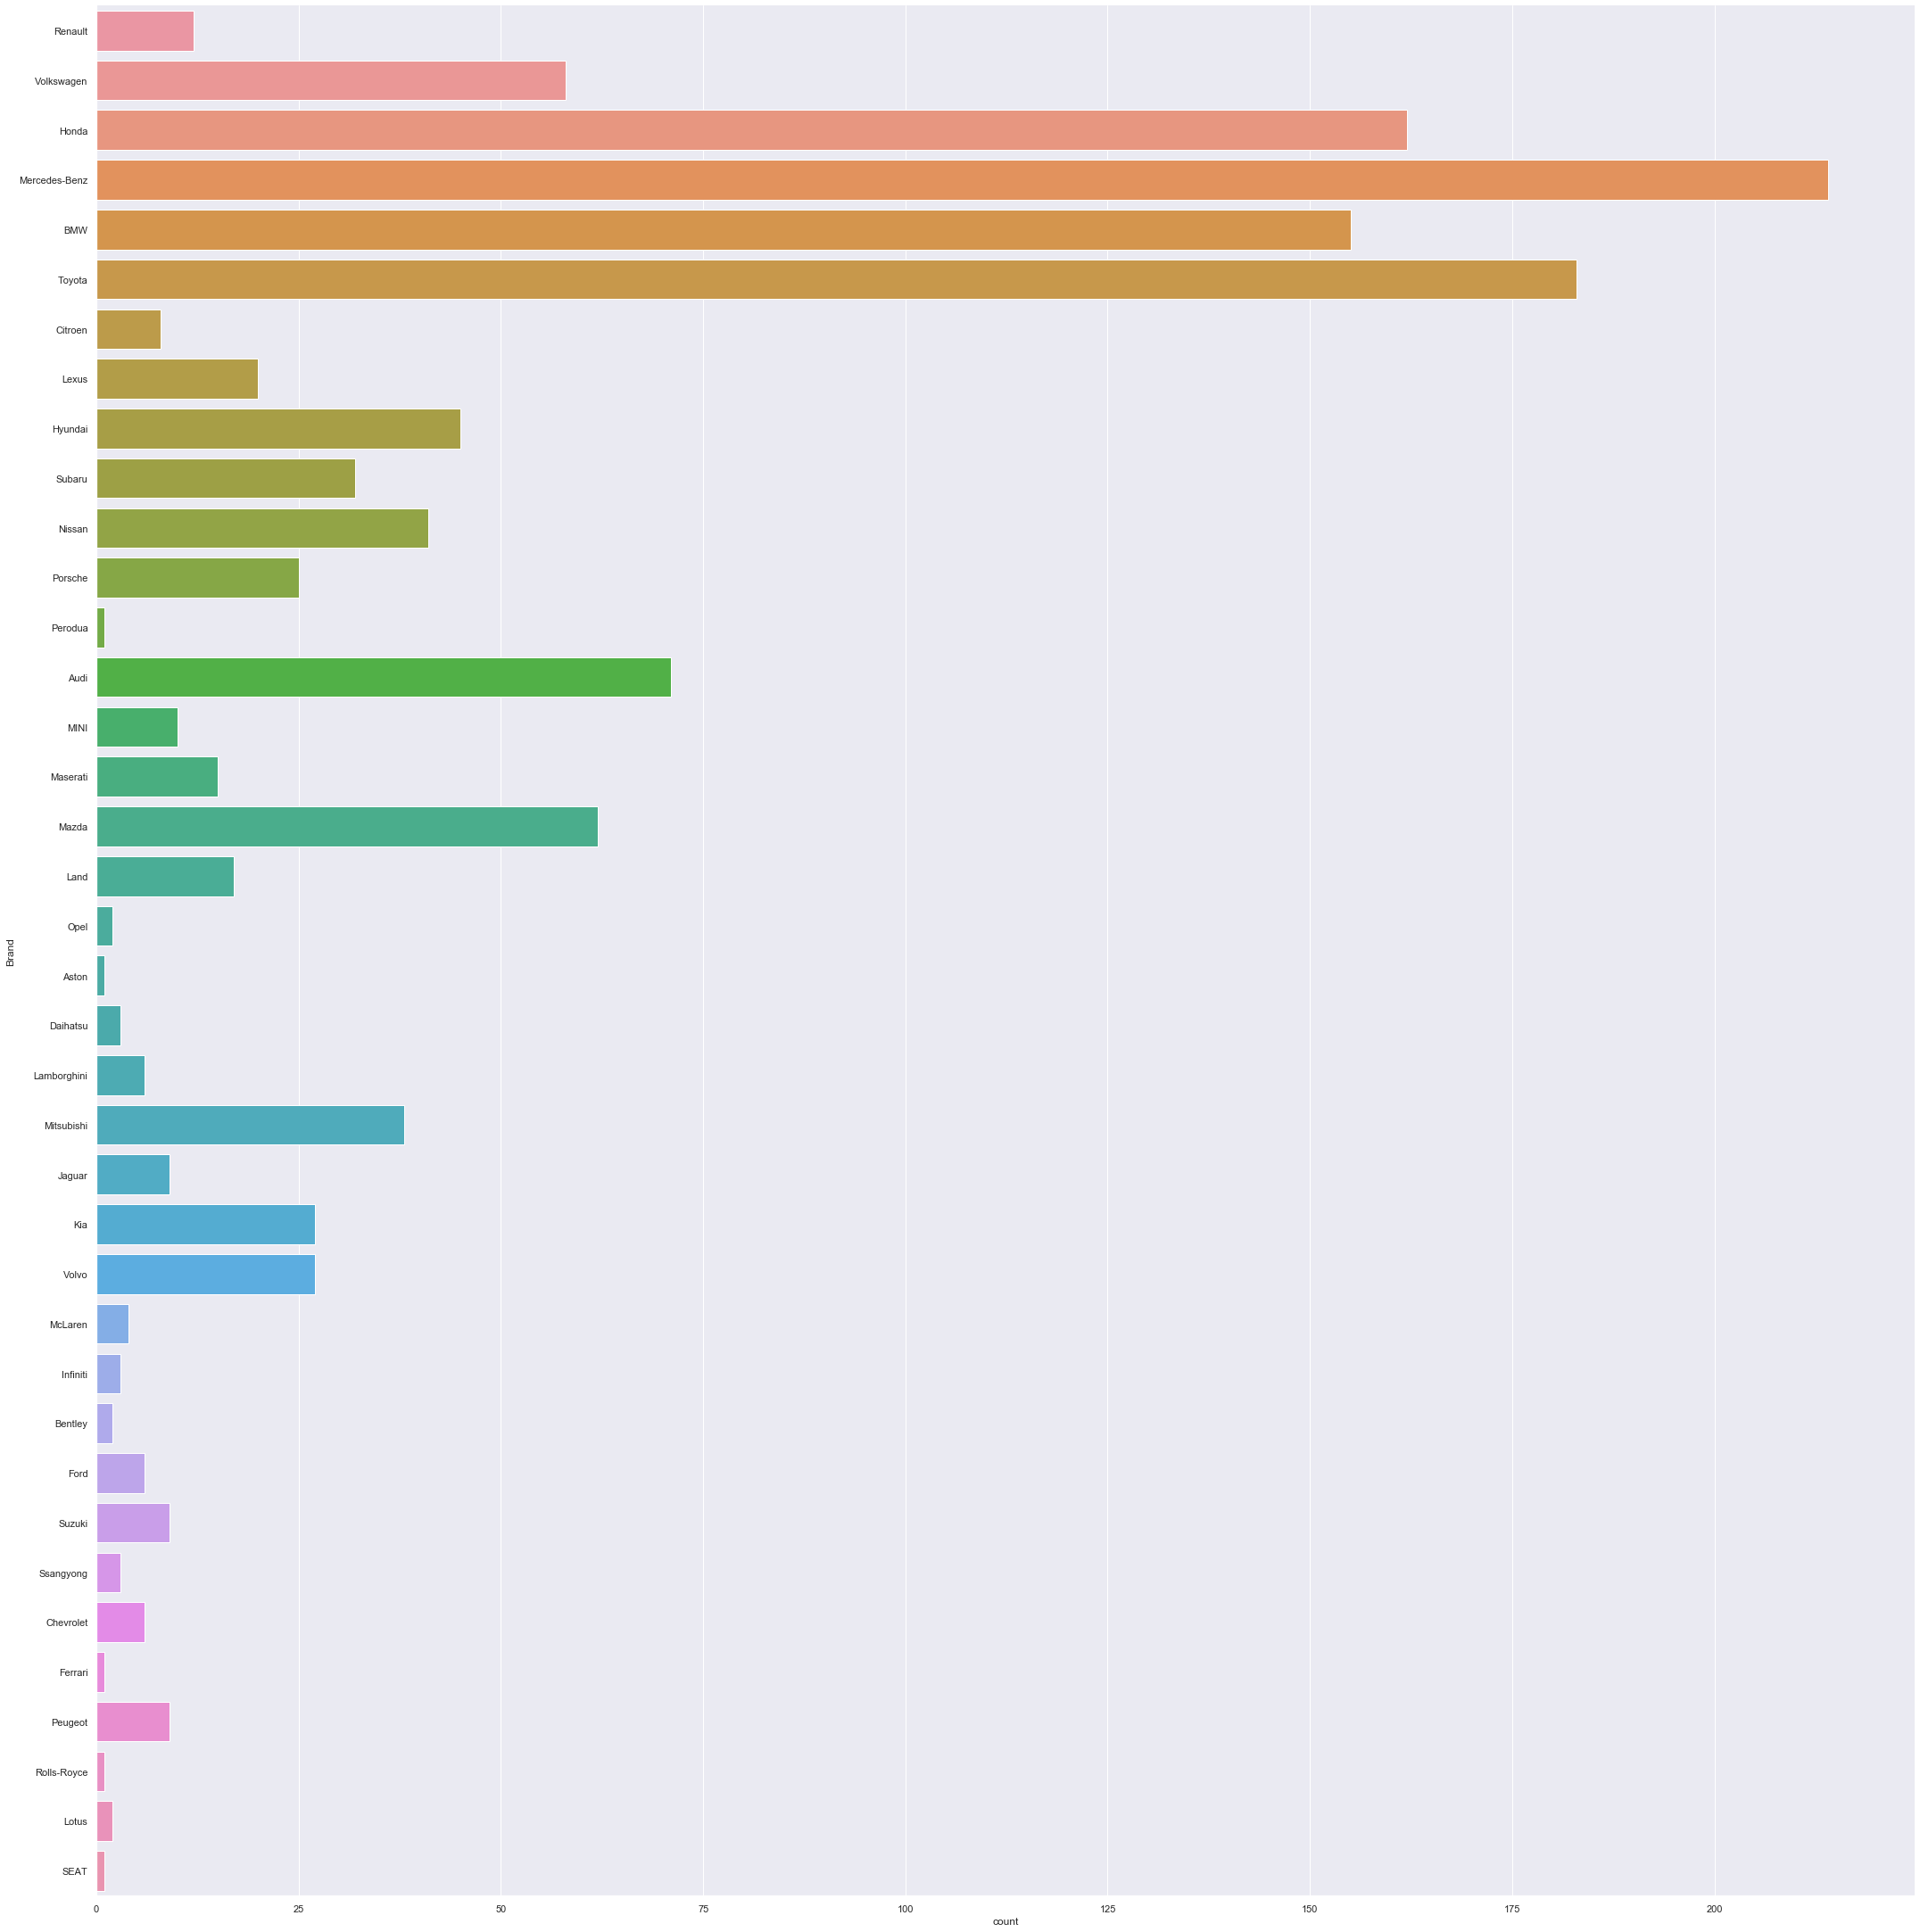

In [14]:
sb.catplot(y="Brand", kind="count", data= df_main, height = 30);

Seems like there quite a number of Mercdes, BMW, Toyota. These cars are usually sedan and luxury sedan type, lets look at the car type to get a better sesnsing

### Type

In SGCarMart there are about 14 types of car types : 
![vehicletype](vehicletype.png)

Lets see how many type of cars we have in our data set and see if there is a high relationship between brand and type 

In [15]:
df_main["Type"].value_counts()

SUV                300
Luxury Sedan       297
Mid-Sized Sedan    207
MPV                164
Sports Car         156
Hatchback          135
Stationwagon        32
Name: Type, dtype: int64

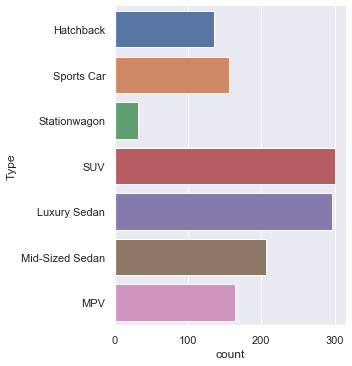

In [16]:
sb.catplot(y="Type", kind="count", data= df_main, height = 5);

Seems like we only managed to scraped 7 types of vehicle, out of 14 listed. This could be a limitation in our project are only able to predict car prices base on this 7 vehicle types.

As expected Mid-Sized Sedan and Luxury Sedan would be quite frequent as the brands that were most frequent in our data set (mercedes BMW, totoyta) mainly produce these type of cars. It is also interesting to note that SUV is the most frequent in our data set.

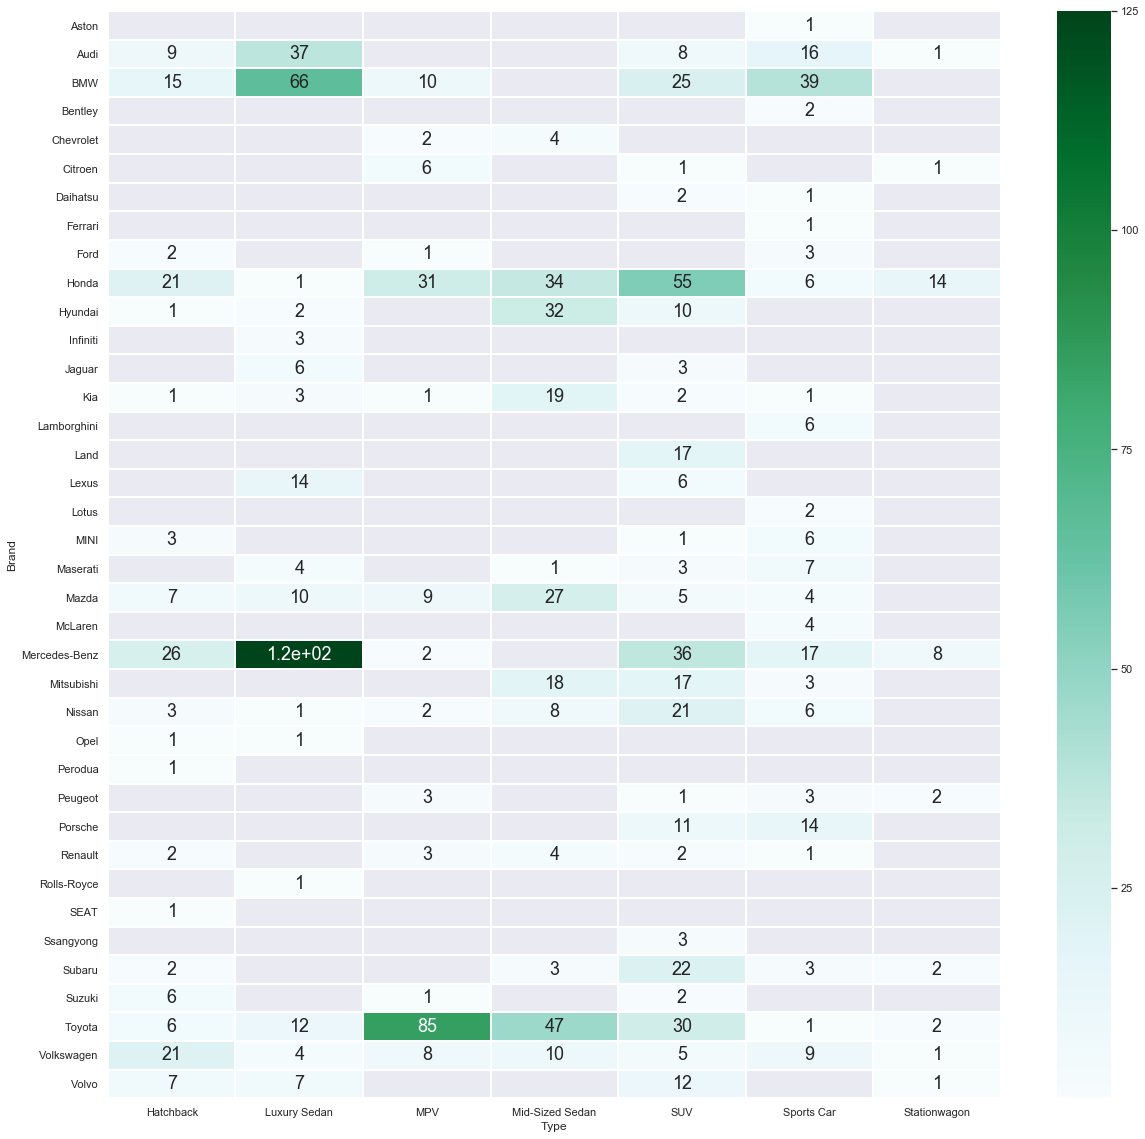

In [17]:
# Distribution of the Two Types
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(df_main.groupby(['Brand', 'Type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

Mercedes is the most common brand in our data set and they produce mostly luxury sedan cars this explains why the most

frequent model is Mercedes-Benz, luxury sedan.

This may be a problem as our prediction may be revolve mainly around mercdes luxury sedan vehicles.

## Transmission

I do know that manual cars are usually cheaper than Auto cars.

Here are some facts which is quite interesting:

1) Automatics are usually more expensive to buy new and second hand.

2) Your budget is always a consideration and manuals are usually cheaper to buy and cheaper to run. They use less fuel and manual transmissions have been known to save drivers between 5% and 15% on their fuel costs.

credits: https://www.budgetdirect.com.sg/blog/car-insurance/manual-versus-automatics-singapore


In [18]:
df_main["Transmission"].value_counts()

1    1266
0      25
Name: Transmission, dtype: int64

As seen above there are significantly more Auto cars than manual, this could be another limitation, but the limitation is only relevant if we decided to use transmission as one of out predictors.

## Explore vehicle price 

In [19]:
df_main["Price"].describe()

count    1.291000e+03
mean     9.661006e+04
std      8.857555e+04
min      7.800000e+03
25%      5.580000e+04
50%      7.500000e+04
75%      1.097330e+05
max      1.327800e+06
Name: Price, dtype: float64

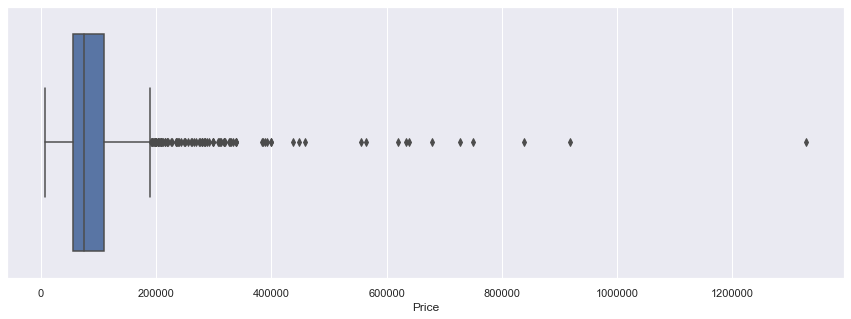

In [20]:
fig, ax = plt.subplots(figsize= (15, 5))
sb.boxplot(x= "Price",data = df_main,)

## Anomaly in car price

In [21]:
#Number of outliers:
spread = 1.097330e+05 - 5.580000e+04
spread *=1.5
upper = 1.097330e+05 + spread
lower = 5.580000e+04 - spread

upper_anomaly = df_main['Price'] > upper
lower_anomaly = df_main['Price'] < lower

anomaly  = df_main[upper_anomaly|lower_anomaly]
anomaly.count()

Brand            90
Type             90
Reg_date         90
Coe_left         90
Dep              90
Mileage          90
Road Tax         90
Dereg Value      90
COE              90
Engine Cap       90
Curb Weight      90
age              90
Transmission     90
OMV              90
ARF              90
Power            90
No. of Owners    90
Price            90
dtype: int64

We have 90 data sets which are considered anomaly/outliers, about 7% of our data lies outside of the whiskers. Let us explore the anomalies.

In [22]:
anomaly["Brand"].value_counts()

Mercedes-Benz    27
BMW              17
Porsche          12
Maserati          8
Lamborghini       6
Audi              4
McLaren           4
Land              3
Bentley           2
Nissan            2
Lexus             1
Rolls-Royce       1
Lotus             1
Aston             1
Ferrari           1
Name: Brand, dtype: int64

In [23]:
anomaly["Type"].value_counts()

Sports Car      43
SUV             22
Luxury Sedan    20
Hatchback        3
MPV              1
Stationwagon     1
Name: Type, dtype: int64

Seems like 
Car Type: sports car contributes to most of the anomalies (almost 50%). Luxury Sedan and SUV makes up the rest of the 50%

Car Brand: Mercedes and BMW is quite a huge contributer. This is not be surprising as they contibuted to most of the data points in our data sets. 

12.6% of mercedes, 11% of BMW contributed to the anomaly.

Almost half of porsche vehicles(48%) contributed to the anomaly of data. Interesting..

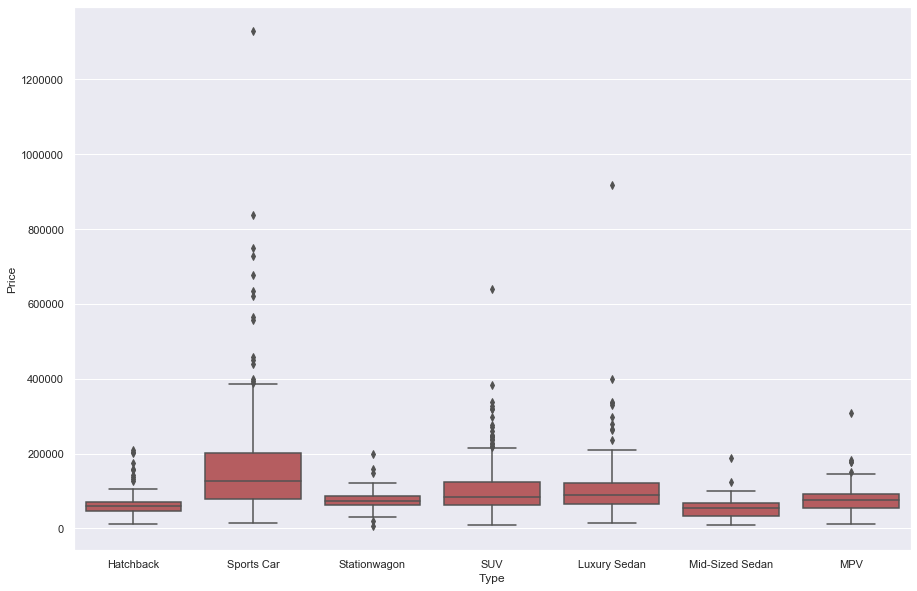

In [24]:
fig, ax = plt.subplots(figsize= (15, 10))
sb.boxplot(x= "Type", y = "Price",data = df_main, color = 'r')

Seems like sports car is usually cost around a higher price point not surprising as they are the no.1 contributer of price anomalies.

In [25]:
df_main["Brand"].value_counts()

Mercedes-Benz    214
Toyota           183
Honda            162
BMW              155
Audi              71
Mazda             62
Volkswagen        58
Hyundai           45
Nissan            41
Mitsubishi        38
Subaru            32
Volvo             27
Kia               27
Porsche           25
Lexus             20
Land              17
Maserati          15
Renault           12
MINI              10
Peugeot            9
Suzuki             9
Jaguar             9
Citroen            8
Ford               6
Lamborghini        6
Chevrolet          6
McLaren            4
Daihatsu           3
Ssangyong          3
Infiniti           3
Bentley            2
Opel               2
Lotus              2
Ferrari            1
Perodua            1
Aston              1
Rolls-Royce        1
SEAT               1
Name: Brand, dtype: int64

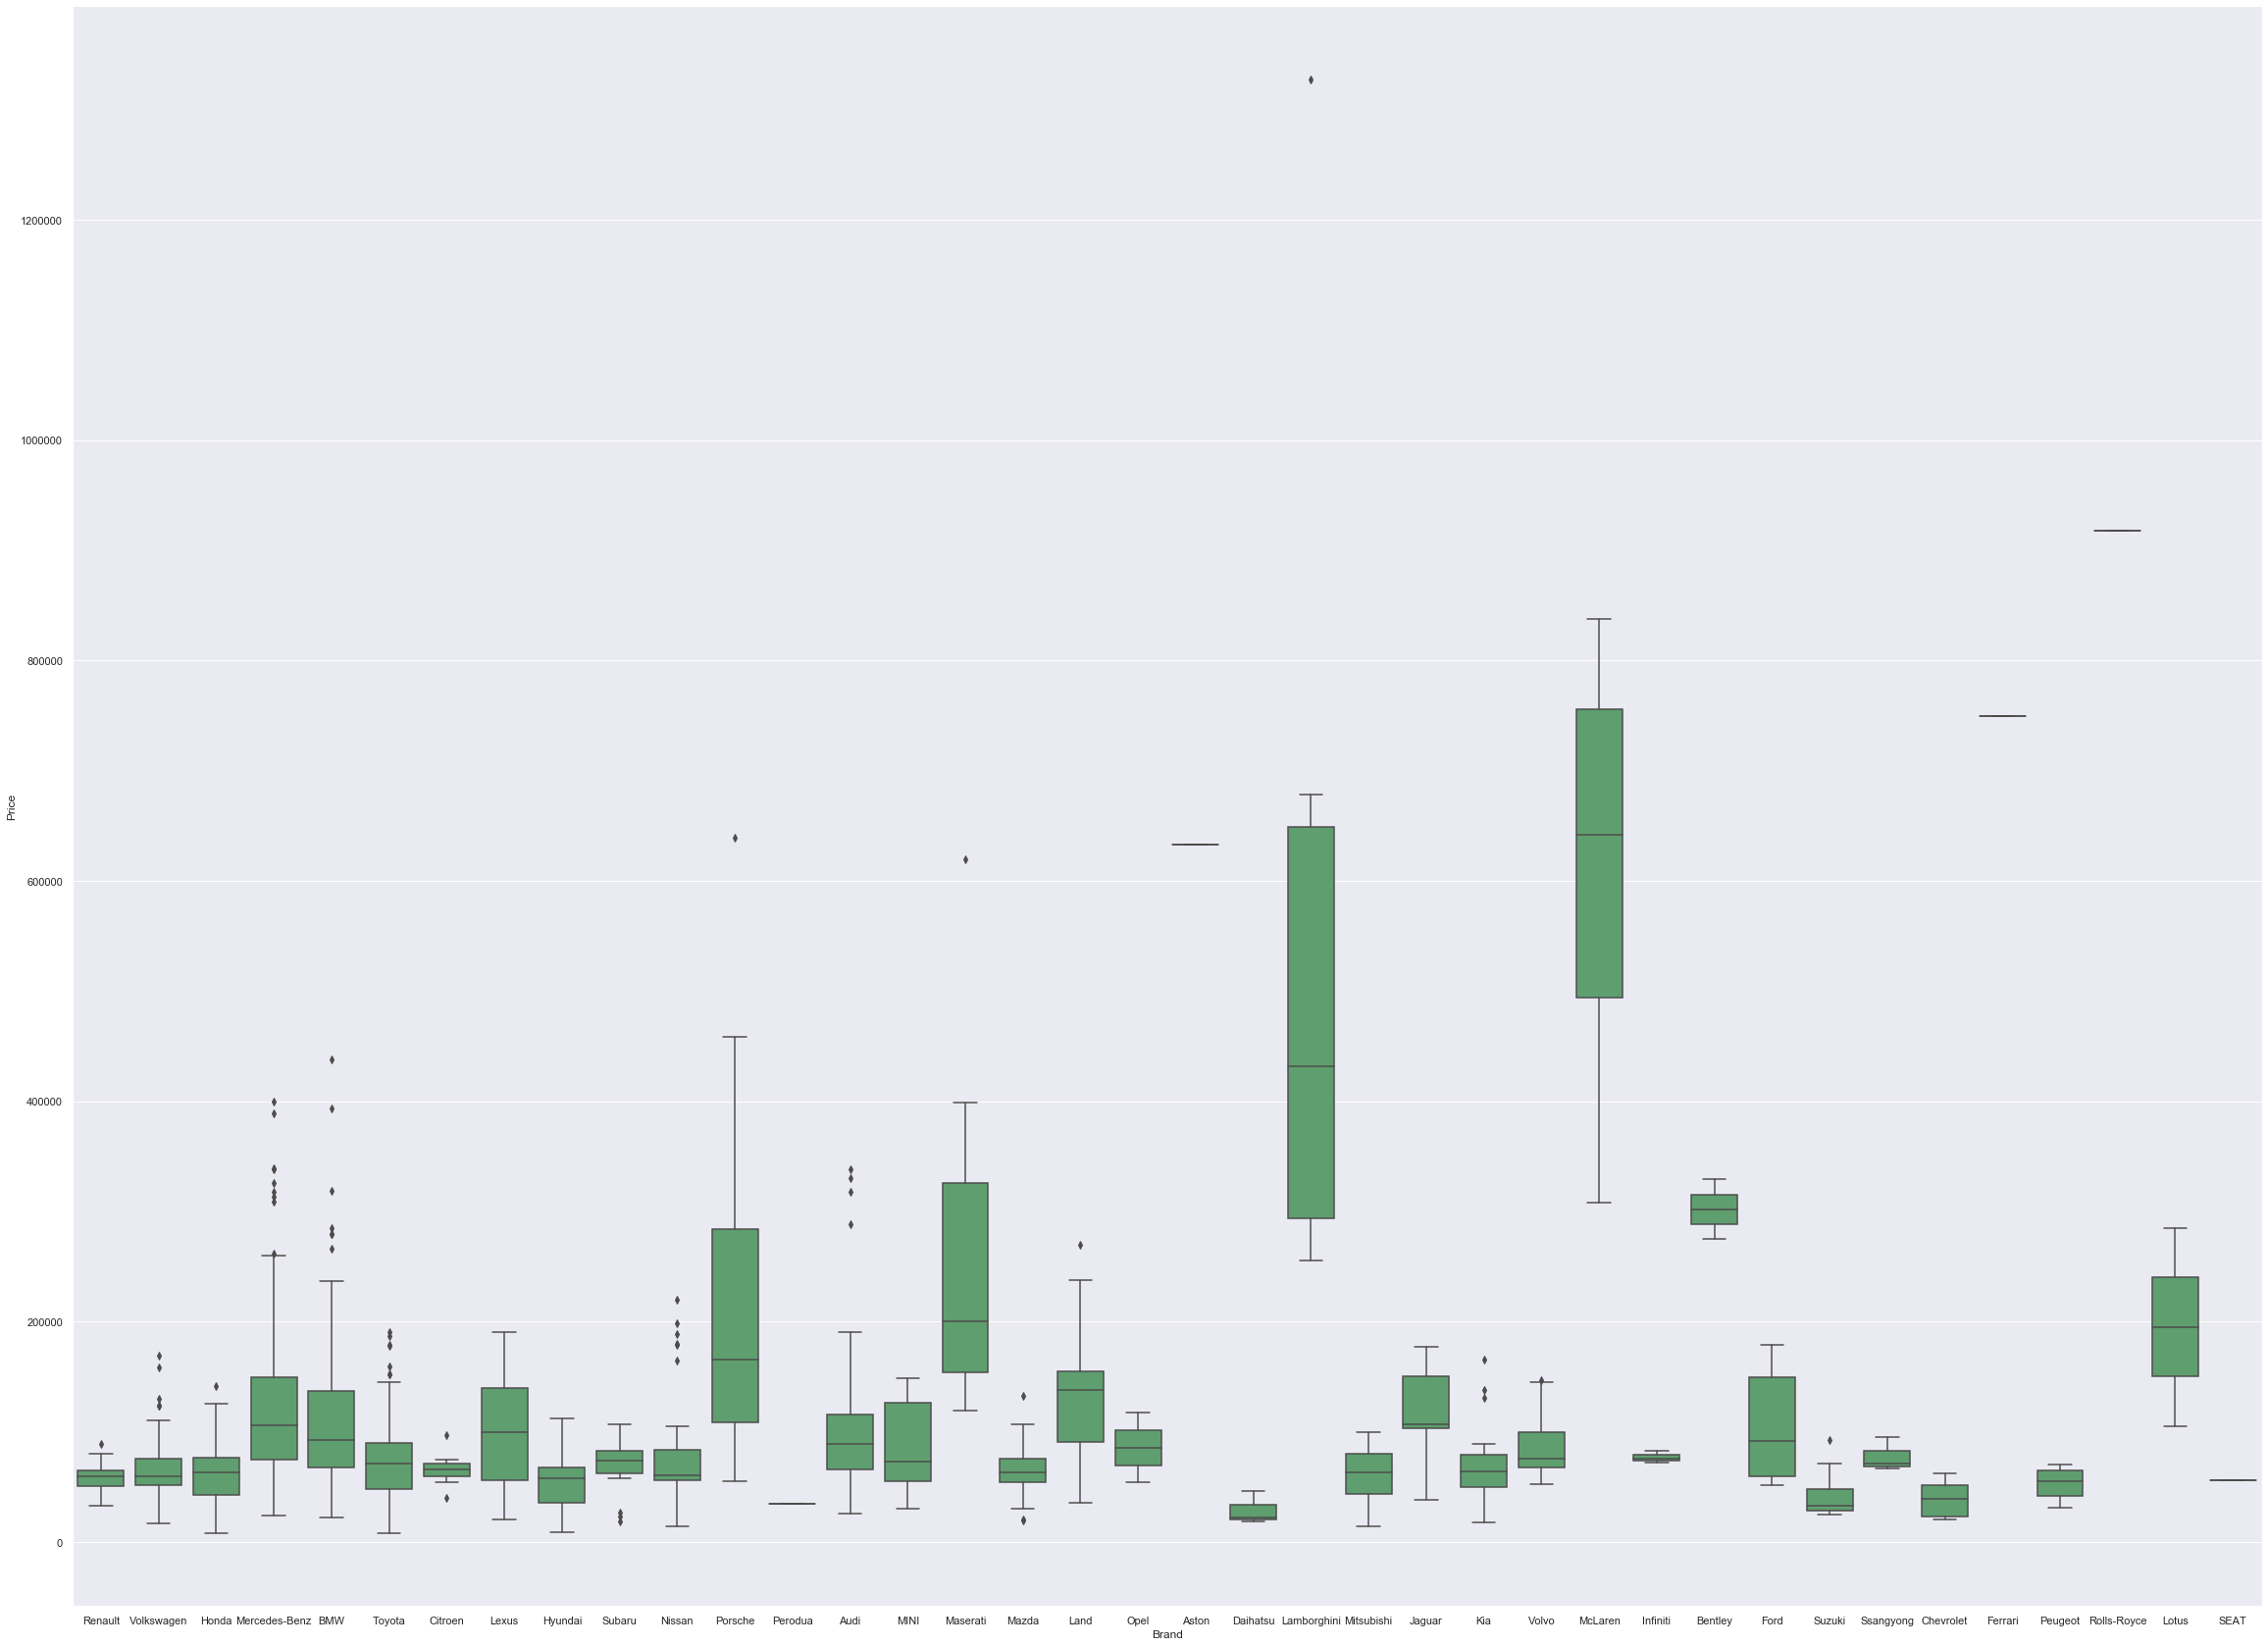

In [26]:
fig, ax = plt.subplots(figsize= (40,30))
sb.boxplot(x= "Brand", y = "Price",data = df_main, color = 'g')

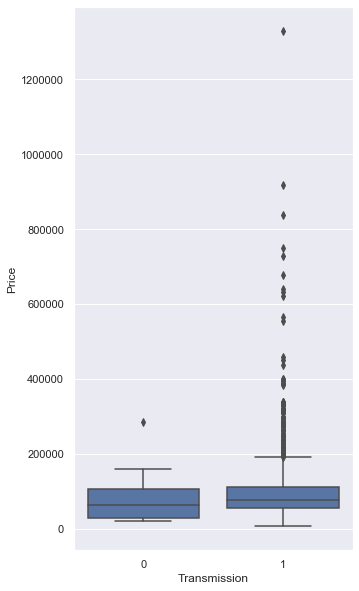

In [27]:
fig, ax = plt.subplots(figsize= (5,10))
sb.boxplot(x= "Transmission", y = "Price",data = df_main, color = 'b')

We cannot really get much information about transmission type, as there we do not have much data sets on Manual car, from the box plot above the median is roughly around the same, but the spread of the price for manual car is much higher than the auto cars.


## Numercial Data

Here is a brief explanation of the numerical predictors:

### Deregistration Value

When you deregister your vehicle, you are likely to be  scrapping it or exporting it.

After disposing of your vehicle, you may be granted PARF/COE rebates, depending on the type and age of your vehicle and your vehicle’s COE expiry date.

You will get a cashback for disposing vehicle, hence that adds to the value of your vehicle. 


### ARF ( Additional Registration fee)

Everyone has to pay for ARF when we register our vehicle in addition to all other relevant fees and taxes.

ARF is dependent on the open market value of you vehicle.

![ARF](ARF.png)

As we can see from above, ARF is despendent of VES (vehicle emission scheme) which is the amount of co2 a particular vehicle produce, 


### OMV 

Open market value, one motoring has all the details of open market value, it varies with date of registration and car make

### Power

Horsepower (hp) is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors.

There are many different standards and types of horsepower. Two common definitions being used today are the mechanical 

horsepower (or imperial horsepower), which is about 745.7 watts, and the metric horsepower, which is approximately 735.5 

watts.

source: https://en.wikipedia.org/wiki/Horsepower


### Depreciation

Annual Depreciation = (Total Cost of Vehicle – Sale Value of Vehicle) / Number of Years in Service

In Singapore, however, the process of calculating vehicle depreciation is more complicated.

There are significant taxes and fees associated with owning and operating a vehicle on the island. 

As a result, there are a number of other important costs to include in the “Total Cost of the Vehicle” calculation shown above.



### Engine Capacity

The bigger the engine capacity, the more powerful the engine.


### Road Tax

Road Tax is generally dependent on engine capacity, however there are some exception, e.g when your vehicle is more than 10 years old.

![roadtax](roadtax.png)




### Curb Weight

To put it simply, the weight of the vehicle, without any occupants.


### Coe

Bain of Singaporeans existance, COE goes by a bidding system. It depends on the demand and supply of a certain vehicle.

### No. Of owners

Number of previous owners before listing

### Age 

Age of car, from maufacturing date.

### Registration Date

Calculated from day of registration to present 

### Mileage 

How far a car has been driven before listing

As we can see from above, filling in missing data is pretty challenging, because the variables depends on so many different

things which cannot be just replaced by mean median or mode. That is why we decided to drop all missing data which could be 

another limitation for our project.

Let's take a look at our numeric datas 

In [28]:
numeric_list = df_main.columns.values.tolist()
to_remove = ["Brand", "Type","Transmission"]

for index in to_remove:
    numeric_list.remove(index)

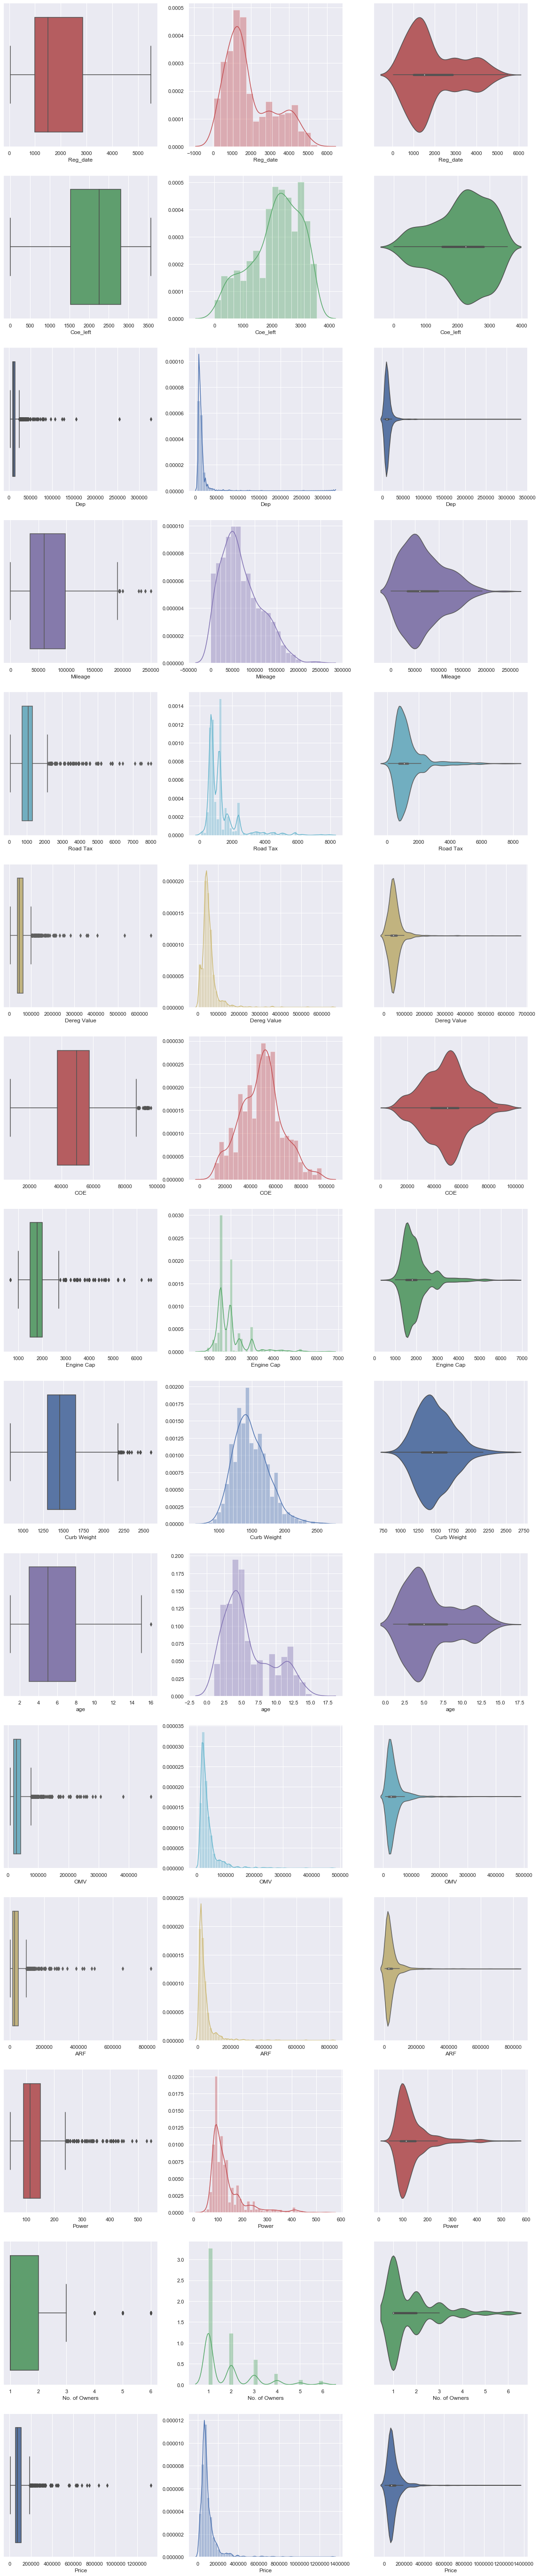

In [29]:
f, axes = plt.subplots(len(numeric_list), 3, figsize=(20, 100))
colors = ["r", "g", "b", "m", "c", "y"]
count = 0 
count1 = 0


df_numeric_list = pd.DataFrame(df_main[numeric_list])

for predictors in df_numeric_list:
    
    sb.boxplot(df_numeric_list[predictors], orient = "h", color = colors[count], ax = axes[count1,0])
    sb.distplot(df_numeric_list[predictors], color = colors[count], ax = axes[count1,1])
    sb.violinplot(df_numeric_list[predictors], color = colors[count], ax = axes[count1,2])
    count+=1
    count1 +=1
    if (count > 5):
        count = 0
    

## Comments 

Seems like only curb weight and coe some what follows the shape of a normal distribution curve 

ARF, registration date, depreciation ,mileage ,Road Tax, OMV, Power and Engine capacity, are skewed towards the right, this 

shows that there are cars in the data set with unsually high values of the above predictors. I think for these few 

predictors (apart from mileage and registration ) the main contributors to the skewing are the luxury cars and sports

cars, think about it, usually sports cars and luxury cars has bigger engine, because they drive faster or they have to 

carry more weight, therefore, they have bigger engine capacity and power. Road tax is depenedent on engine capacity and

usually sports cars and luxury cost more to manufacture hence their OMV also ARF will be high.

I believe luxury cars will depreciate in value more as they have more "room" for depreciation. For example a 90K car is 

unlikely to depreciation by 10k, because the owner might as well scrap it as he could earn more. While on the other hand a 

300k car is very likely to devalue to 210k.


Seems like days COE left is the only predictor which is skewing to the left. Well maybe it is not related to

the open market value.



## Correlation


Base on the brief explanation of the numeric data sets, we kinf of expect some data to be highly correlated as they follow

a certain formula E.g:

ARF and OMV

Registration date and age

Road tax and engine size

Let us take a look at the correlation table.


(15.5, -0.5)

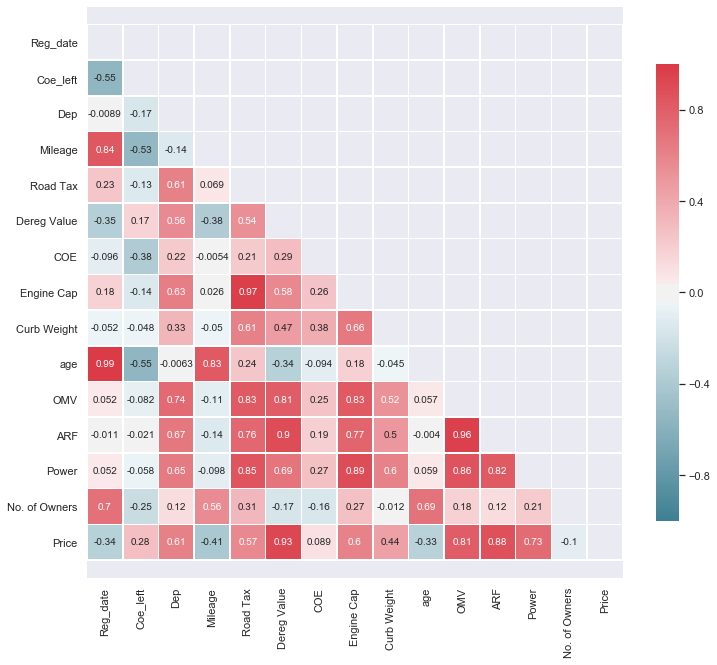

In [30]:
# Compute the correlation matrix
corr = df_numeric_list.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap= cmap,annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) ## to ensure that the graph is not cut off

Okay most of my prediction are right, but there are still a number data sets which are higly correlated lets see:

ARF and deregistration value: 0.9

Age and Mileage: 0.83 (ok expected ...)

Power and OMV: 0.86 (perhaps "higher power" vehicles would correlated to higher open market value): 0.86

Power and engine capacity: 0.89 (sort of expected as engine size, we would need a higher engine capacity for more power) 

## Machine Learning

Firstly, we can set a baseline accuracy for our models and predictions. To achieve this, we look at a univariate correlation between Deregistration value and the price of the vehicle. Deregistration value is chosen for its high correlation to price which will probably give us a reasonable estimation of vehicle price.

In [31]:
# a dictionary to record results from each model
cmp_dict = {'Univariate_dereg_value':[],
            'Linear':[],
            'Ridge':[],
            'Lasso':[],
            'Linear_log_std':[],
            'Ridge_log_std':[],
            'Lasso_log_std':[]}

In [32]:
df_univariate = df_main[['Dereg Value', 'Price']]

In [33]:
df_univariate.shape

(1291, 2)

Now we do some exploration on the the 2 variables we are using for the regression model.

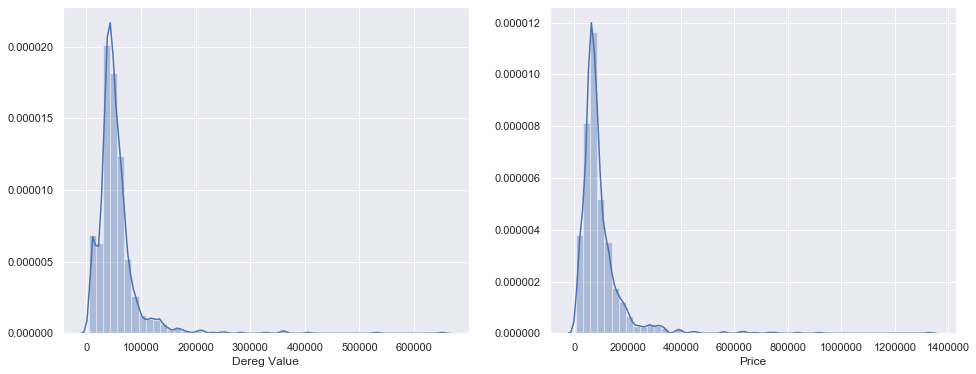

In [34]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))

sb.distplot(df_univariate['Dereg Value'], ax = axes[0])
sb.distplot(df_univariate['Price'], ax = axes[1])

As seen from the distribution plot above, both Deregistration Value and price follows a right-skewed distribution with a very large range. To remedy the skew of the features, we apply log transformation to both the features below.

C:\Users\65844\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\65844\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


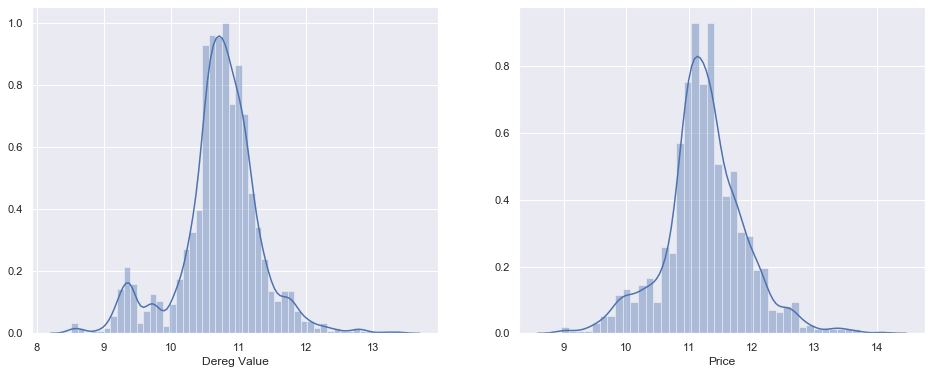

In [35]:
df_univariate['Price'] = df_univariate['Price'].apply(np.log)
df_univariate['Dereg Value'] = df_univariate['Dereg Value'].apply(np.log)

f, axes = plt.subplots(1, 2, figsize=(16, 6))

sb.distplot(df_univariate['Dereg Value'], ax = axes[0])
sb.distplot(df_univariate['Price'], ax = axes[1])

Intercept of Regression 	: b =  [0.71427152]

    Predictors  Coefficients
0  Dereg Value      0.982642

Accuracy/Explained variance of train 	: 0.8475094134792394
MSE of train				: 0.06740836304296478
Accuracy/Explained variance of test	: 0.8543952362503949
MSE of test				: 0.052761099786220005


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

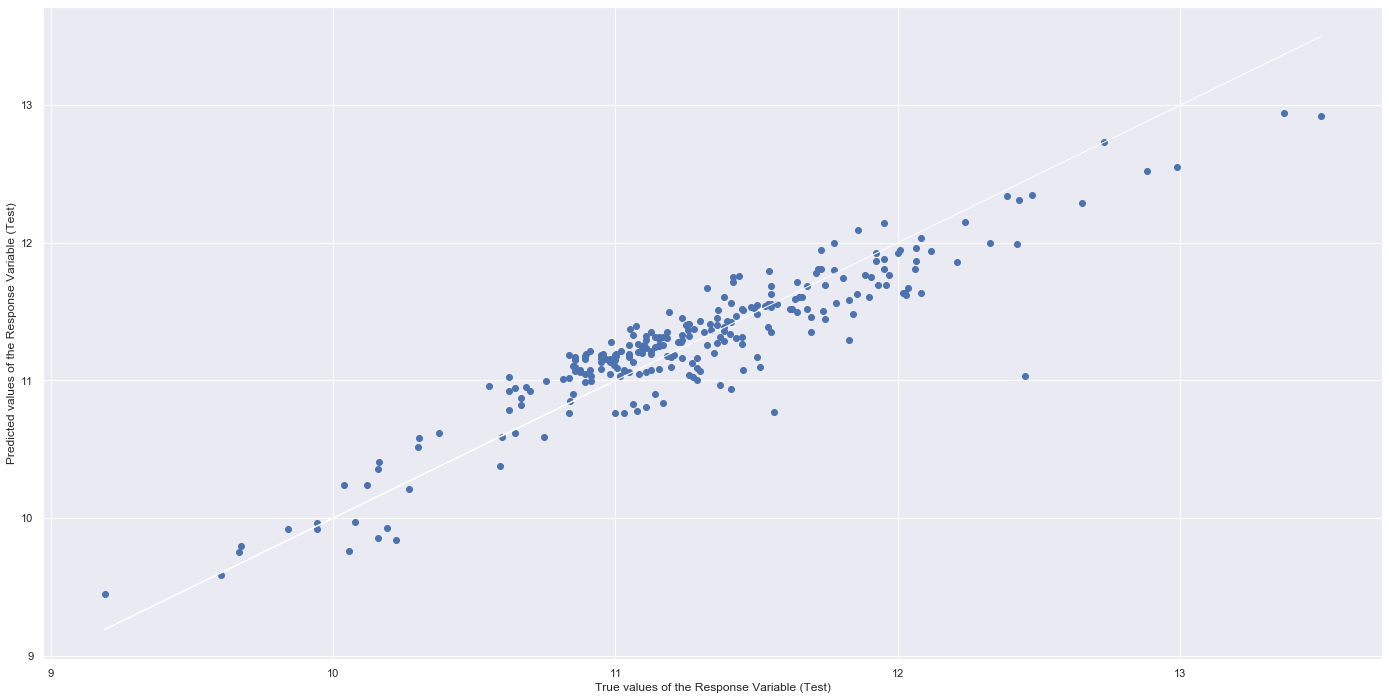

In [37]:
predictor = pd.DataFrame(df_univariate['Dereg Value'])
result = pd.DataFrame(df_univariate['Price'])
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print()
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()
print("Accuracy/Explained variance of train \t:", linreg.score(X_train, y_train))
print('MSE of train\t\t\t\t:', mean_squared_error(y_train, y_train_pred))
print("Accuracy/Explained variance of test\t:", linreg.score(X_test, y_test))
print('MSE of test\t\t\t\t:', mean_squared_error(y_test, y_test_pred))

cmp_dict['Univariate_dereg_value'].append(linreg.score(X_train, y_train))
cmp_dict['Univariate_dereg_value'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Univariate_dereg_value'].append(linreg.score(X_test, y_test))
cmp_dict['Univariate_dereg_value'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

After setting a benchmark for ourselves, now we explore if the addition of other features will improve the accuracy of the model. Below, we separate the numerical from categorical data for cleaning, and converting the categorical data into dummy variables.

In [38]:
df_num = df_main.drop(columns = ['Brand', 'Type'])
df_cat = df_main[['Brand', 'Type']]

In [39]:
df_num

,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,age,Transmission,OMV,ARF,Power,No. of Owners,Price
0,286,3380,8780,4500,1148,35770,26659,1461,1501,1,1,23315,14641,81,1,88999
5,1339,2317,10460,57100,620,51540,52503,1390,1245,4,1,22743,23841,90,1,79000
8,1449,2228,8850,53444,682,33072,45000,1496,1130,5,1,17439,7439,97,3,57800
9,481,3192,6630,13428,182,23215,15001,1496,1220,2,1,22445,13423,101,1,64800
11,1310,2345,16880,81000,1202,72323,56500,1991,1735,4,1,39668,47536,155,1,133300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,229,3436,14710,5500,976,66386,38602,1798,1120,2,0,34180,39852,156,1,159000
4362,1419,2258,9030,66000,682,36449,47020,1496,1190,5,1,19780,9780,96,1,60800
4363,1596,2068,10750,95000,1210,55802,57501,1998,1480,5,1,27591,30628,123,1,76700
4366,1142,2229,10470,48000,1210,51775,50621,1998,1664,4,1,21514,22120,111,1,83800


For the next 2 parts, we will be doing multi-variate regression using a combination of the predictors. We decided to try 3 different linear models: ridge, lasso and linear, and will compare and see if there are differences in performance. Both ridge and lasso regression uses regularization which adds a constraint to coefficients. Shrinking the coefficients could leads to a lower variance, decreasing the complexity of the model, and hopefully can observe a difference in performance from linear regression.

1. The predictors will be fit into the models with no changes.


2. Selected predictors are adjusted using the log transformation while the remaining predictors are adjusted using StandardScaler from sklearn to adjust the range and variance of the predictors.

Accuracy/Explained variance 	: 0.9367559585694065
MSE				: 0.02291700556268664


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

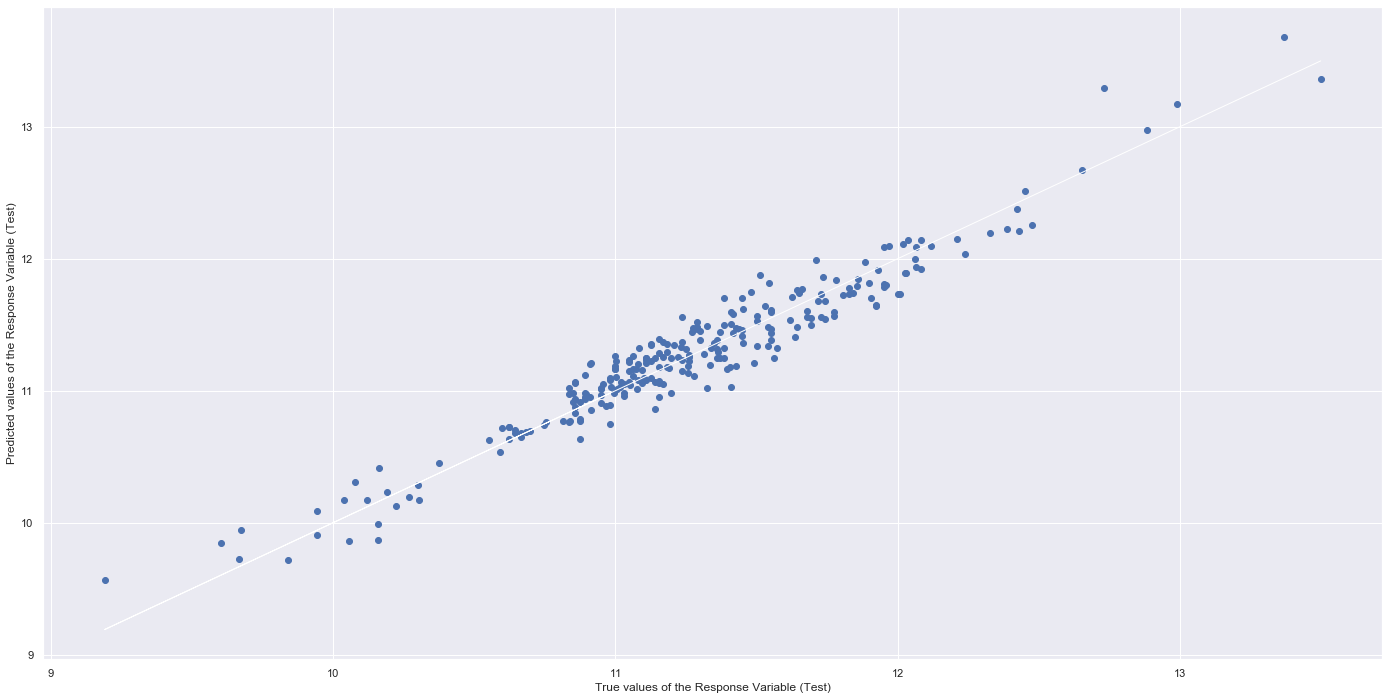

In [40]:
predictor = df_num.drop(columns = 'Price')
result = df_num['Price'].apply(np.log)
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

print("Accuracy/Explained variance \t:", linreg.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))

cmp_dict['Linear'].append(linreg.score(X_train, y_train))
cmp_dict['Linear'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Linear'].append(linreg.score(X_test, y_test))
cmp_dict['Linear'].append(mean_squared_error(y_test, y_test_pred))


f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

Accuracy/Explained variance 	: 0.9366575759374784
MSE				: 0.022952655329402435
Alpha selected			: 3.0


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

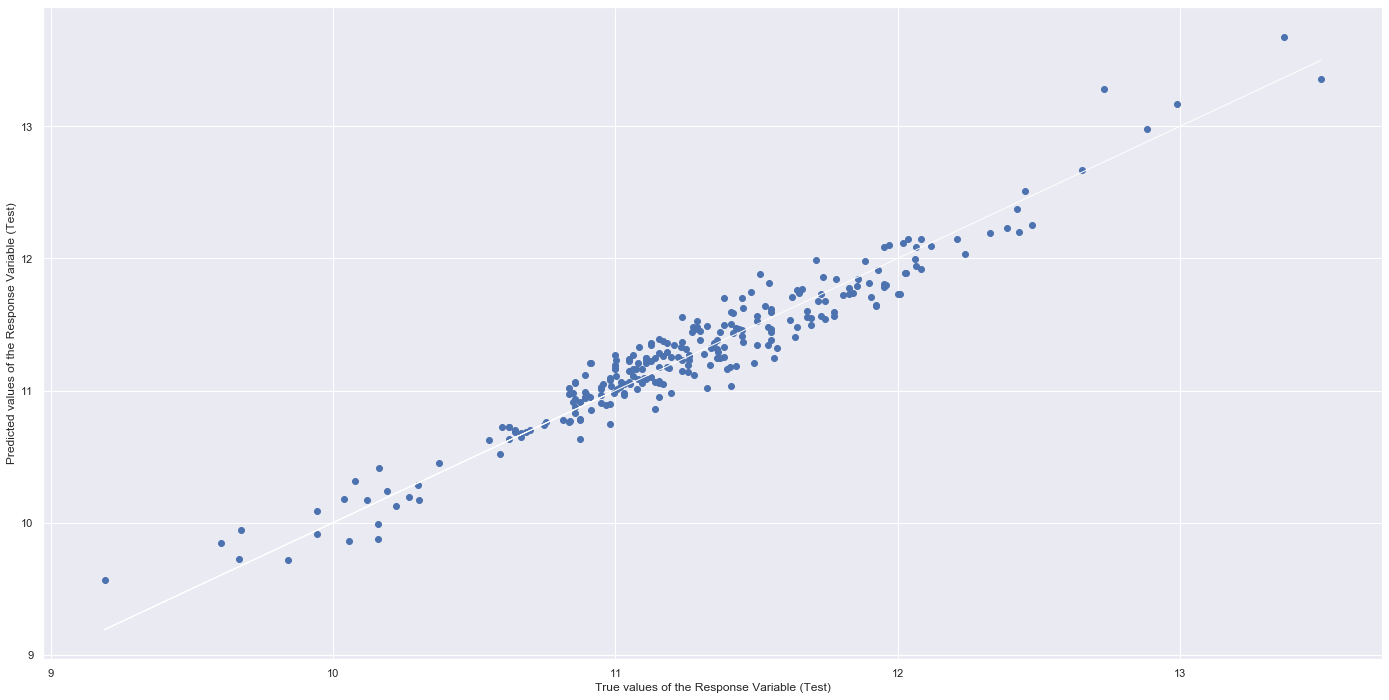

In [41]:
predictor = df_num.drop(columns = 'Price')
result = df_num['Price'].apply(np.log)
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Accuracy/Explained variance \t:", ridge.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))
print('Alpha selected\t\t\t:', ridge.alpha_)

cmp_dict['Ridge'].append(ridge.score(X_train, y_train))
cmp_dict['Ridge'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Ridge'].append(ridge.score(X_test, y_test))
cmp_dict['Ridge'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

Accuracy/Explained variance 	: 0.9364432918602112
MSE				: 0.023030302950896087
Alpha selected			: 0.001


C:\Users\65844\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\65844\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34473026477848734, tolerance: 0.03081670926061844
  tol, rng, random, positive)
C:\Users\65844\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6369745175590165, tolerance: 0.03027803425023234
  tol, rng, random, positive)
C:\Users\65844\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the numb

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

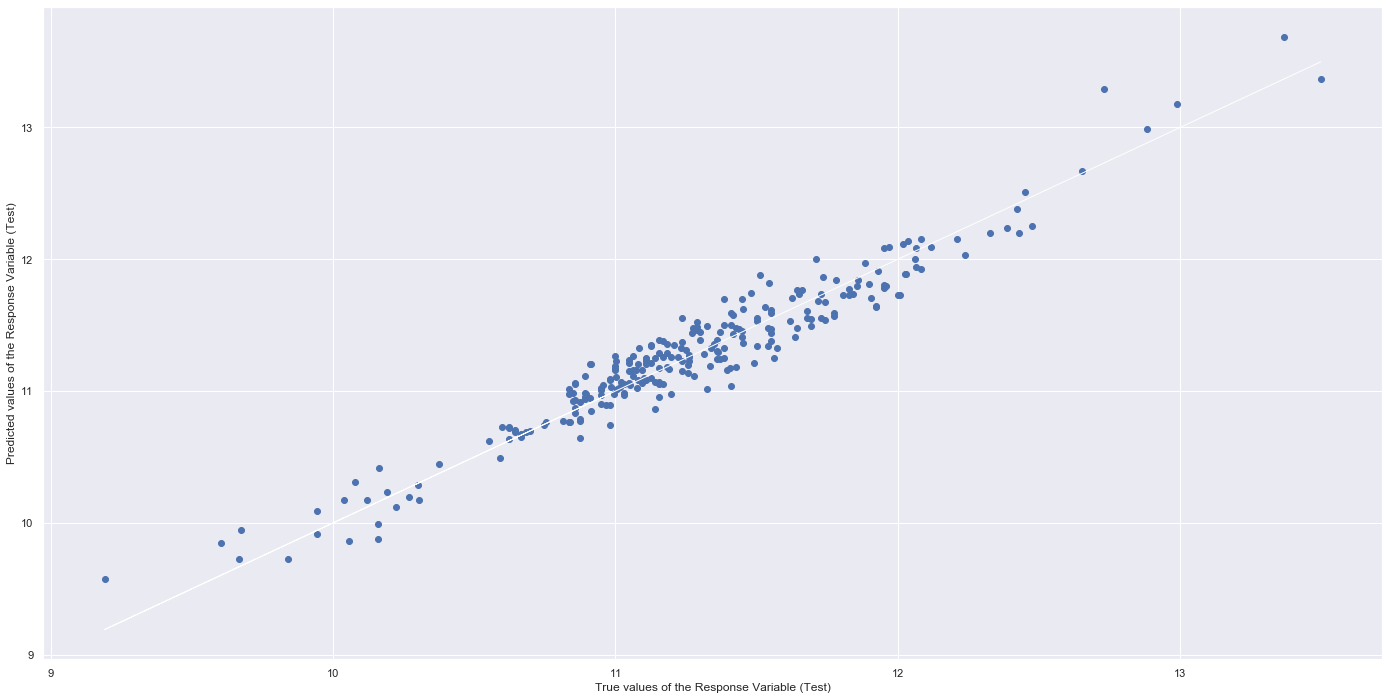

In [42]:
result = df_num['Price'].apply(np.log)
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Accuracy/Explained variance \t:", lasso.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))
print('Alpha selected\t\t\t:', lasso.alpha_)

cmp_dict['Lasso'].append(lasso.score(X_train, y_train))
cmp_dict['Lasso'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Lasso'].append(lasso.score(X_test, y_test))
cmp_dict['Lasso'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

In [44]:
temp_dict = dict((k,cmp_dict[k]) for k in ['Univariate_dereg_value','Linear', 'Ridge', 'Lasso'])
cmp_result = pd.DataFrame.from_dict(temp_dict, orient='index', columns=['Train R^2', 'Train MSE', 'Test R^2', 'Test MSE'])
cmp_result

,Train R^2,Train MSE,Test R^2,Test MSE
Univariate_dereg_value,0.847509,0.067408,0.854395,0.052761
Linear,0.934977,0.028743,0.936756,0.022917
Ridge,0.934957,0.028752,0.936658,0.022953
Lasso,0.934853,0.028798,0.936443,0.023030


(16.5, -0.5)

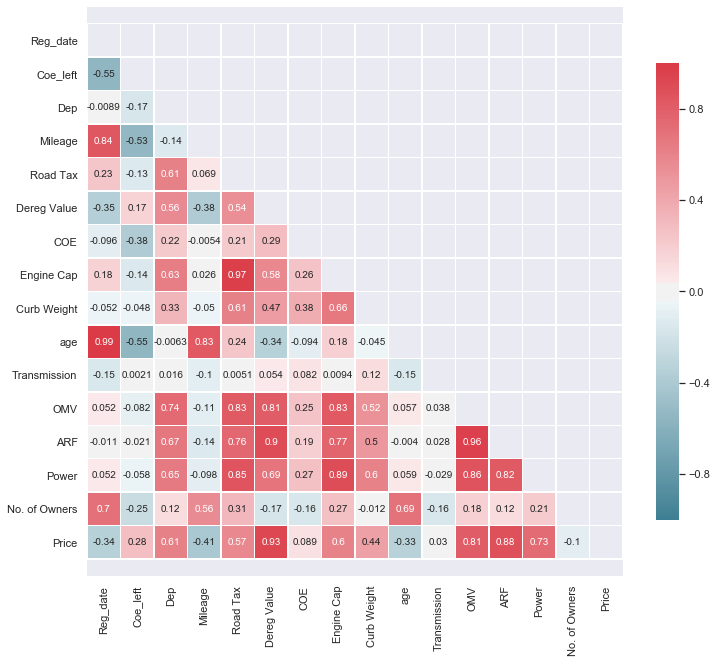

In [45]:
# Compute the correlation matrix
corr = df_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap= cmap,annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) ## to ensure that the graph is not cut off

Observing from the correlation table above, there are predictors that are highly correlated with another predictor. This may pose a problem as one assumption made when using Ordinary Least Squares(OLS) method is that there is no multi-collinearity. Thus we decided to drop some of the predictors to try and reduce this the effects of this ssue.


1. Reg_date has high correlation against age: Age is calculated from the manufacturing year, where the manufacturing year is closely related to the vehicle's registration date. Thus, drop Reg_date.


2. Road Tax has high correlation against Engine cap: Road Tax can be calculated based on the engine capacity on a per annum basis. Thus, drop Road Tax.


3. OMV has high correlation against ARF: OMV (Open Market Value) is the listed price at the first registration date of the vehicle, while ARF (Additional Registration Fee) is a tax imposed upon registration of a vehicle. Calculation of ARF is dependent on OMV of a vehicle. Thus, drop ARF.


4. Dereg Value has high correlation against ARF: This is probably because the deregistration value can be calculated from a variable which is dependent on ARF. And since this overlaps with the point above, we chose to drop ARF.


5. Engine cap has high correlation against power: Engine capacity is basically an expression of the engine's total area, which affects the amount of air available for combustion within the engine. Although there are many other factors affecting the power of a vehicle, one of it could be the engine the size of the engine. Thus, since power is dependent on engine cap, we chose to drop power.

In [46]:
df_num = df_num.drop(columns=['Reg_date', 'Road Tax', 'ARF', 'Power'])
df_num

,Coe_left,Dep,Mileage,Dereg Value,COE,Engine Cap,Curb Weight,age,Transmission,OMV,No. of Owners,Price
0,3380,8780,4500,35770,26659,1461,1501,1,1,23315,1,88999
5,2317,10460,57100,51540,52503,1390,1245,4,1,22743,1,79000
8,2228,8850,53444,33072,45000,1496,1130,5,1,17439,3,57800
9,3192,6630,13428,23215,15001,1496,1220,2,1,22445,1,64800
11,2345,16880,81000,72323,56500,1991,1735,4,1,39668,1,133300
...,...,...,...,...,...,...,...,...,...,...,...,...
4359,3436,14710,5500,66386,38602,1798,1120,2,0,34180,1,159000
4362,2258,9030,66000,36449,47020,1496,1190,5,1,19780,1,60800
4363,2068,10750,95000,55802,57501,1998,1480,5,1,27591,1,76700
4366,2229,10470,48000,51775,50621,1998,1664,4,1,21514,1,83800


From the histogram in the diagonal of the pairplot and distplot below, we can identify the skew and range of each features.

Obesrving the plots above, we may need to adjust the distribution curve for Price, OMV, Dep, Dereg Value because of the skewness.

We perform log transformation for the selected predictors (Price, OMV, Dep, Dereg Value) and standardize the remaining 

predictors using sklearn StandardScaler.

Apart from normalising a skewed curve, with a log-log model our data set spread more evenly as variables with higher 

magnitude will be sort of "penalised".


![log](log.png)

The distplots of the before and after transformation can be observed below.

In [47]:
df_log_standardize = df_main.copy()
df_log_standardize_num = df_log_standardize.drop(columns = ['Brand','Type'])
df_log_standardize_num.drop(columns=['Reg_date', 'Road Tax', 'ARF', 'Power'], inplace=True)
df_log_standardize_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 4369
Data columns (total 12 columns):
Coe_left         1291 non-null int64
Dep              1291 non-null int64
Mileage          1291 non-null int64
Dereg Value      1291 non-null int64
COE              1291 non-null int64
Engine Cap       1291 non-null int64
Curb Weight      1291 non-null int64
age              1291 non-null int32
Transmission     1291 non-null int32
OMV              1291 non-null int64
No. of Owners    1291 non-null int64
Price            1291 non-null int64
dtypes: int32(2), int64(10)
memory usage: 121.0 KB


In [48]:
df_log_standardize_num_before = df_log_standardize_num.copy()
df_log_standardize_num[['OMV', 'Dep', 'Dereg Value', 'Price']] = df_log_standardize_num[['OMV', 'Dep', 'Dereg Value', 'Price']].apply(np.log)
df_to_scale = df_log_standardize_num[['Coe_left', 'Mileage', 'COE', 'Engine Cap', 'Curb Weight', 'Transmission', 'No. of Owners', 'age']]
standardize = preprocessing.StandardScaler()
df_log_standardize_num[['Coe_left', 'Mileage', 'COE', 'Engine Cap', 'Curb Weight', 'Transmission', 'No. of Owners', 'age']] = standardize.fit_transform(df_to_scale)
df_log_standardize_num

,Coe_left,Dep,Mileage,Dereg Value,COE,Engine Cap,Curb Weight,age,Transmission,OMV,No. of Owners,Price
0,1.427881,9.080232,-1.425455,10.484865,-1.330289,-0.695121,0.049419,-1.396890,0.140525,10.056852,-0.661109,11.396380
5,0.206791,9.255314,-0.261385,10.850113,0.234686,-0.790571,-0.928413,-0.535537,0.140525,10.032013,-0.661109,11.277203
8,0.104555,9.088173,-0.342294,10.406442,-0.219656,-0.648069,-1.367673,-0.248420,0.140525,9.766464,1.080710,10.964744
9,1.211922,8.799360,-1.227873,10.052554,-2.036235,-0.648069,-1.023904,-1.109772,0.140525,10.018823,-0.661109,11.079061
11,0.238955,9.733885,0.267537,11.188897,0.476723,0.017387,0.943218,-0.535537,0.140525,10.588300,-0.661109,11.800358
...,...,...,...,...,...,...,...,...,...,...,...,...
4359,1.492210,9.596283,-1.403324,11.103241,-0.607084,-0.242074,-1.405869,-1.109772,-7.116179,10.439396,-0.661109,11.976659
4362,0.139017,9.108308,-0.064422,10.503669,-0.097335,-0.648069,-1.138494,-0.248420,0.140525,9.892427,-0.661109,11.015345
4363,-0.079240,9.282661,0.577366,10.929565,0.537339,0.026798,-0.030794,-0.248420,0.140525,10.225245,-0.661109,11.247657
4366,0.105704,9.256269,-0.462773,10.854663,0.120722,0.026798,0.672022,-0.535537,0.140525,9.976459,-0.661109,11.336188


In [49]:
df_log_standardize_num_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 4369
Data columns (total 12 columns):
Coe_left         1291 non-null int64
Dep              1291 non-null int64
Mileage          1291 non-null int64
Dereg Value      1291 non-null int64
COE              1291 non-null int64
Engine Cap       1291 non-null int64
Curb Weight      1291 non-null int64
age              1291 non-null int32
Transmission     1291 non-null int32
OMV              1291 non-null int64
No. of Owners    1291 non-null int64
Price            1291 non-null int64
dtypes: int32(2), int64(10)
memory usage: 121.0 KB


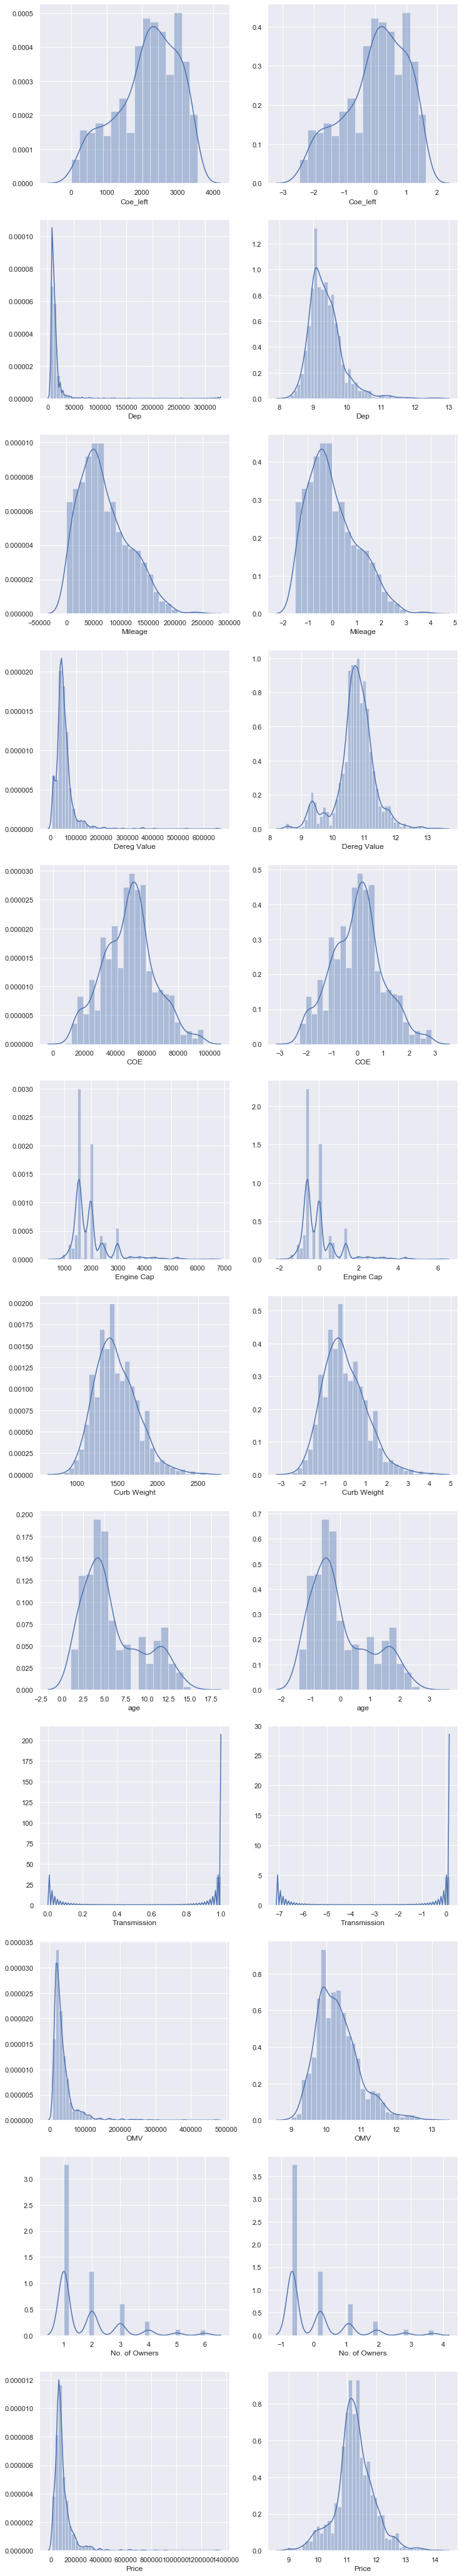

In [50]:
f, axes = plt.subplots(12, 2, figsize=(12, 75))
count = 0
for col in df_log_standardize_num:
    sb.distplot(df_log_standardize_num_before[col], ax=axes[count, 0])
    sb.distplot(df_log_standardize_num[col], ax=axes[count, 1])
    count+=1

Accuracy/Explained variance 	: 0.983563346201039
MSE				: 0.005955958506480391


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

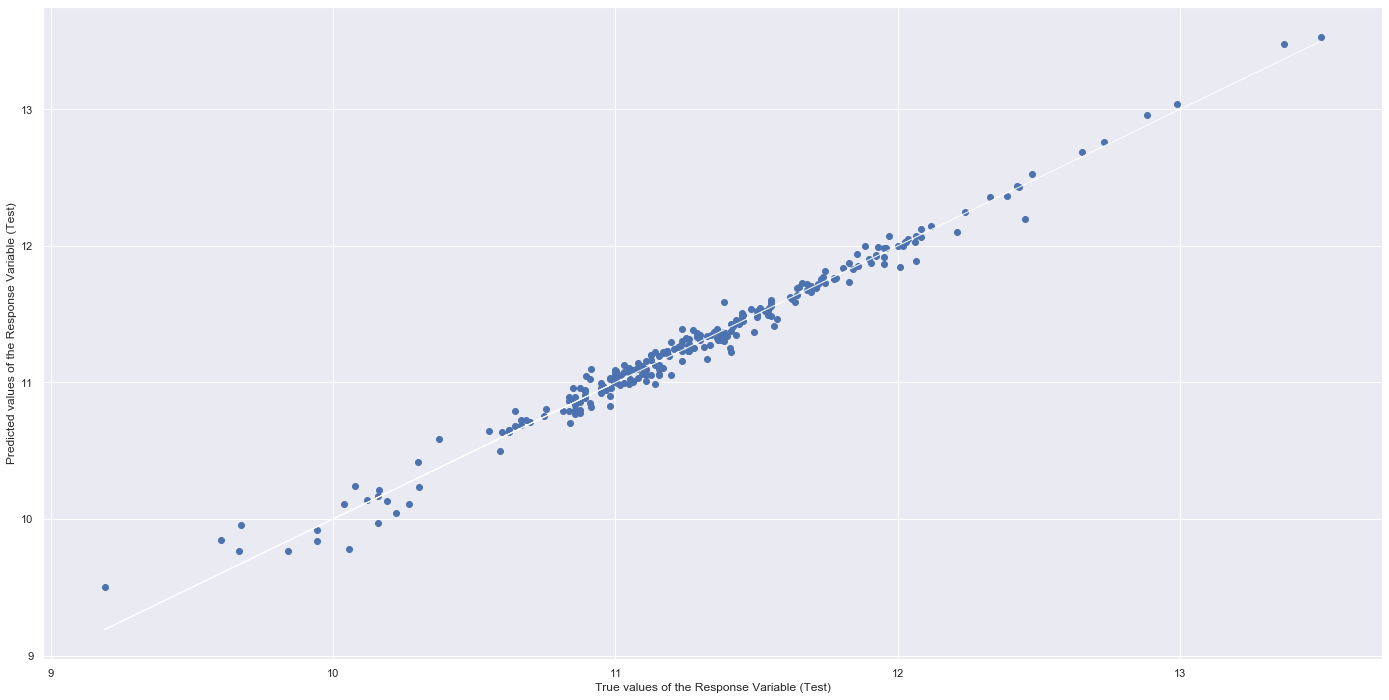

In [51]:
predictor = df_log_standardize_num.drop(columns='Price')
result = df_log_standardize_num['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

print("Accuracy/Explained variance \t:", linreg.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))

cmp_dict['Linear_log_std'].append(linreg.score(X_train, y_train))
cmp_dict['Linear_log_std'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Linear_log_std'].append(linreg.score(X_test, y_test))
cmp_dict['Linear_log_std'].append(mean_squared_error(y_test, y_test_pred))


f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

Accuracy/Explained variance 	: 0.9832803424082222
MSE				: 0.006058507289694469
Alpha selected			: 1.0


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

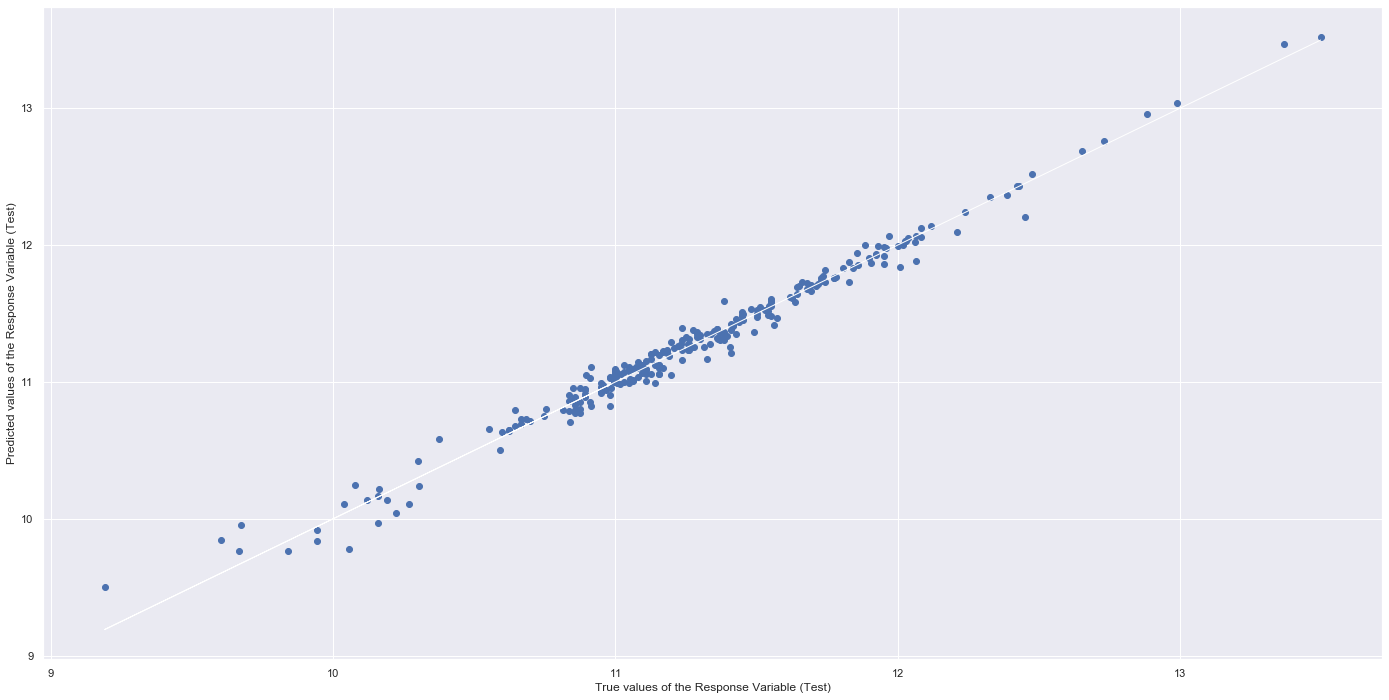

In [52]:
predictor = df_log_standardize_num.drop(columns = 'Price')
result = df_log_standardize_num['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Accuracy/Explained variance \t:", ridge.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))
print('Alpha selected\t\t\t:', ridge.alpha_)

cmp_dict['Ridge_log_std'].append(ridge.score(X_train, y_train))
cmp_dict['Ridge_log_std'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Ridge_log_std'].append(ridge.score(X_test, y_test))
cmp_dict['Ridge_log_std'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

Accuracy/Explained variance 	: 0.9834758232559005
MSE				: 0.005987673175170636
Alpha selected			: 0.001


C:\Users\65844\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

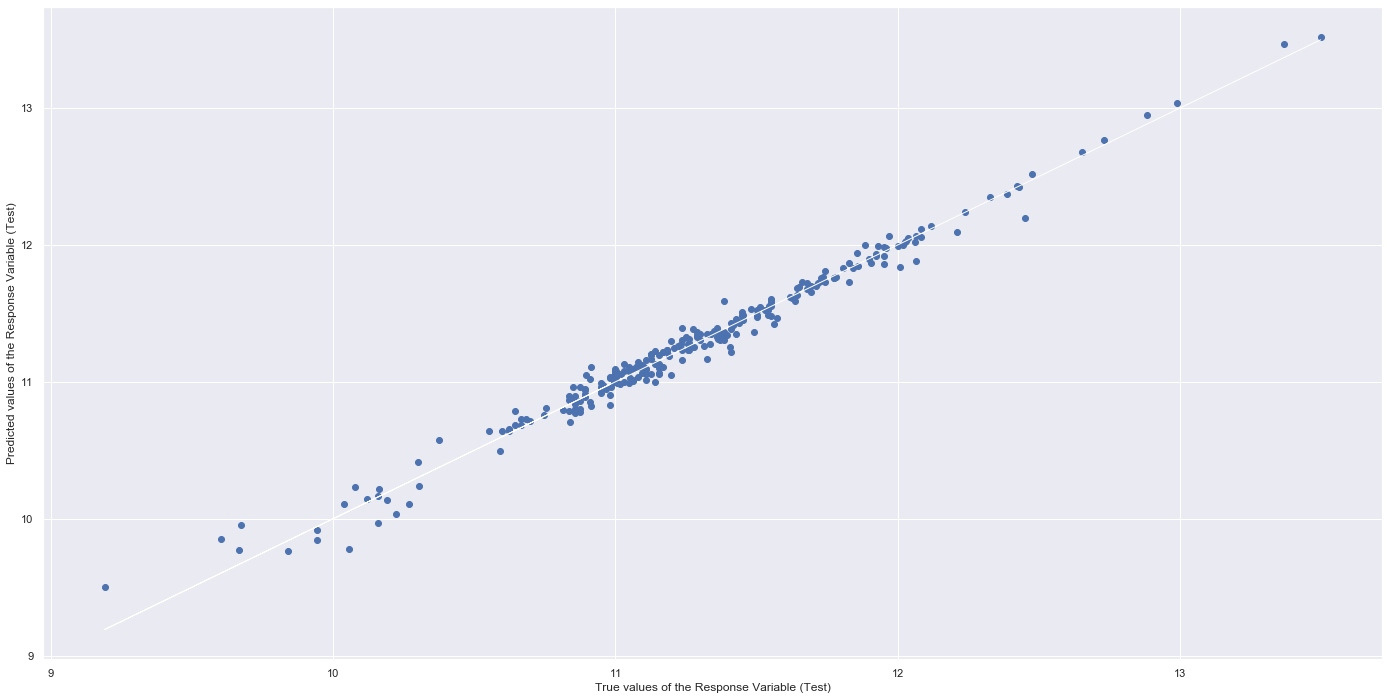

In [53]:
predictor = df_log_standardize_num.drop(columns = 'Price')
result = df_log_standardize_num['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Accuracy/Explained variance \t:", lasso.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))
print('Alpha selected\t\t\t:', lasso.alpha_)

cmp_dict['Lasso_log_std'].append(lasso.score(X_train, y_train))
cmp_dict['Lasso_log_std'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Lasso_log_std'].append(lasso.score(X_test, y_test))
cmp_dict['Lasso_log_std'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

From the comparison table below, we can observe that by applying log transformation to the predictors provided some improvement within the models. 

Consistently, the linear model has had the lowest MSE compared to the rest of the models. We expected some difference in performance from using ridge and lasso regression. This is because both ridge and lasso shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

However this was not the case. One possible reason could be that there were too little predictors, hence the difference in performance was not significant.

In [54]:
cmp_result = pd.DataFrame.from_dict(cmp_dict, orient='index', columns=['Train R^2', 'Train MSE', 'Test R^2', 'Test MSE'])
cmp_result

,Train R^2,Train MSE,Test R^2,Test MSE
Univariate_dereg_value,0.847509,0.067408,0.854395,0.052761
Linear,0.934977,0.028743,0.936756,0.022917
Ridge,0.934957,0.028752,0.936658,0.022953
Lasso,0.934853,0.028798,0.936443,0.023030
Linear_log_std,0.978924,0.009317,0.983563,0.005956
Ridge_log_std,0.978906,0.009324,0.983280,0.006059
Lasso_log_std,0.978891,0.009331,0.983476,0.005988


In this portion, we will determine if the addition of dummy variables will help improve the fit of the model. The model we chose is the linear model, together with standardized predictors, which had the lowest MSE from the above comparison table.

In [55]:
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Citroen,Brand_Daihatsu,Brand_Ferrari,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Type_Luxury Sedan,Type_MPV,Type_Mid-Sized Sedan,Type_SUV,Type_Sports Car,Type_Stationwagon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4362,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4363,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df_log_standardize_concat = pd.concat([df_dummies, df_log_standardize_num], axis=1)
df_log_standardize_concat

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Citroen,Brand_Daihatsu,Brand_Ferrari,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Mileage,Dereg Value,COE,Engine Cap,Curb Weight,age,Transmission,OMV,No. of Owners,Price
0,0,0,0,0,0,0,0,0,0,0,...,-1.425455,10.484865,-1.330289,-0.695121,0.049419,-1.396890,0.140525,10.056852,-0.661109,11.396380
5,0,0,0,0,0,0,0,0,0,0,...,-0.261385,10.850113,0.234686,-0.790571,-0.928413,-0.535537,0.140525,10.032013,-0.661109,11.277203
8,0,0,0,0,0,0,0,0,1,0,...,-0.342294,10.406442,-0.219656,-0.648069,-1.367673,-0.248420,0.140525,9.766464,1.080710,10.964744
9,0,0,0,0,0,0,0,0,1,0,...,-1.227873,10.052554,-2.036235,-0.648069,-1.023904,-1.109772,0.140525,10.018823,-0.661109,11.079061
11,0,0,0,0,0,0,0,0,0,0,...,0.267537,11.188897,0.476723,0.017387,0.943218,-0.535537,0.140525,10.588300,-0.661109,11.800358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,0,0,0,0,0,0,0,0,0,0,...,-1.403324,11.103241,-0.607084,-0.242074,-1.405869,-1.109772,-7.116179,10.439396,-0.661109,11.976659
4362,0,0,0,0,0,0,0,0,1,0,...,-0.064422,10.503669,-0.097335,-0.648069,-1.138494,-0.248420,0.140525,9.892427,-0.661109,11.015345
4363,0,0,0,0,0,0,0,0,0,0,...,0.577366,10.929565,0.537339,0.026798,-0.030794,-0.248420,0.140525,10.225245,-0.661109,11.247657
4366,0,0,0,0,0,0,0,0,0,0,...,-0.462773,10.854663,0.120722,0.026798,0.672022,-0.535537,0.140525,9.976459,-0.661109,11.336188


In [57]:
num_categorical_dict = {'num_categorical':[]}

Accuracy/Explained variance 	: 0.9834111471142369
MSE				: 0.006011109114189521


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

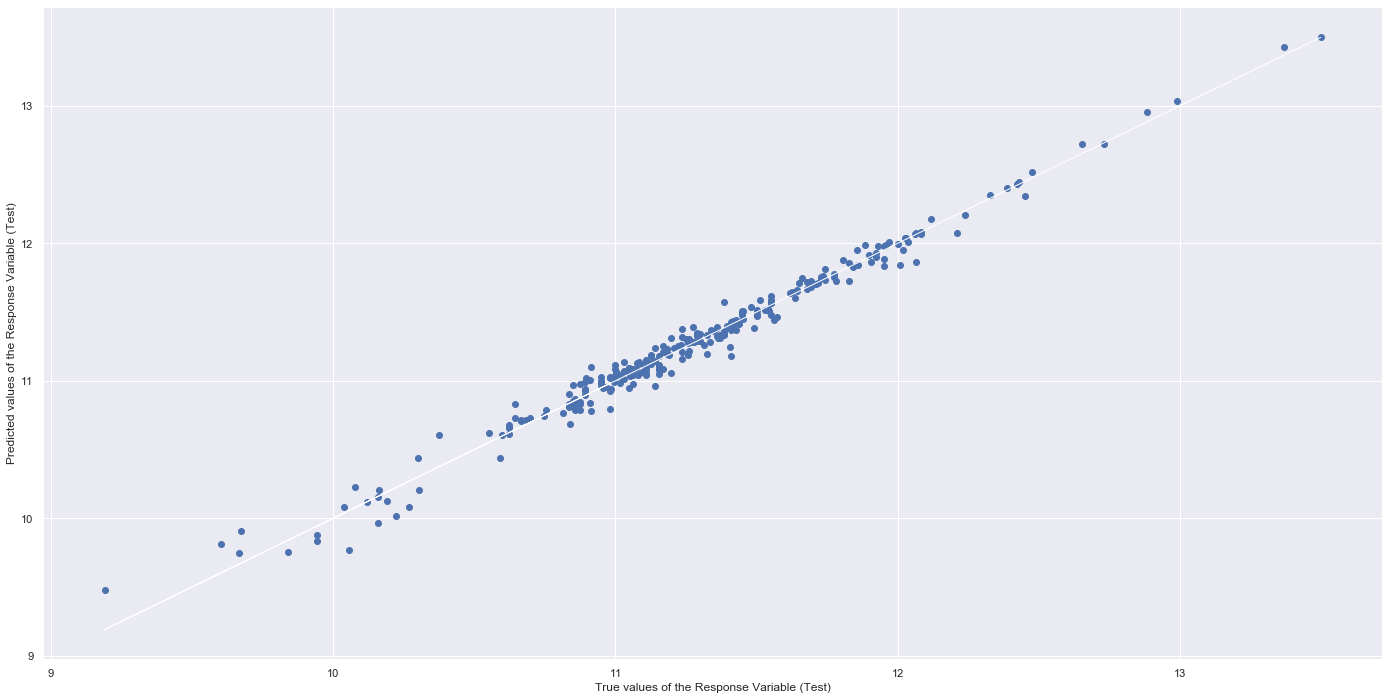

In [58]:
predictor = df_log_standardize_concat.drop(columns='Price')
result = df_log_standardize_concat['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
print("Accuracy/Explained variance \t:", linreg.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))

num_categorical_dict['num_categorical'].append(linreg.score(X_train, y_train))
num_categorical_dict['num_categorical'].append(mean_squared_error(y_train, y_train_pred))
num_categorical_dict['num_categorical'].append(linreg.score(X_test, y_test))
num_categorical_dict['num_categorical'].append(mean_squared_error(y_test, y_test_pred))
cmp_dict.update(num_categorical_dict)

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

In [59]:
cmp_result = pd.DataFrame.from_dict(cmp_dict, orient='index', columns=['Train R^2', 'Train MSE', 'Test R^2', 'Test MSE'])
cmp_result

,Train R^2,Train MSE,Test R^2,Test MSE
Univariate_dereg_value,0.847509,0.067408,0.854395,0.052761
Linear,0.934977,0.028743,0.936756,0.022917
Ridge,0.934957,0.028752,0.936658,0.022953
Lasso,0.934853,0.028798,0.936443,0.023030
Linear_log_std,0.978924,0.009317,0.983563,0.005956
Ridge_log_std,0.978906,0.009324,0.983280,0.006059
Lasso_log_std,0.978891,0.009331,0.983476,0.005988
num_categorical,0.980551,0.008597,0.983411,0.006011


Comparing the results above with the results from the linear model using only numeric data, there was no significant improvement in both R^2 value and also the MSE.

## Back to reality

Bringing back to reality, what features are actually readily accessible to most people?

Most of the predictors above are accessible with a vehicle log card, but what about Depreciation, COE price, OMV, Dereg Value? These information varies with market changes and it is harder to get a hold off at any point of time.



In [60]:
reality_check = df_log_standardize_num.drop(columns = ["Dep", "COE", "OMV", "Dereg Value"])

reality_check.corr()

,Coe_left,Mileage,Engine Cap,Curb Weight,age,Transmission,No. of Owners,Price
Coe_left,1.000000,-0.531278,-0.141923,-0.047928,-0.549325,0.002063,-0.246283,0.495243
Mileage,-0.531278,1.000000,0.025956,-0.050301,0.830707,-0.103293,0.561691,-0.610397
Engine Cap,-0.141923,0.025956,1.000000,0.660303,0.182783,0.009428,0.269275,0.508834
Curb Weight,-0.047928,-0.050301,0.660303,1.000000,-0.044857,0.121362,-0.011809,0.550767
age,-0.549325,0.830707,0.182783,-0.044857,1.000000,-0.149074,0.694394,-0.579259
Transmission,0.002063,-0.103293,0.009428,0.121362,-0.149074,1.000000,-0.156762,0.053445
No. of Owners,-0.246283,0.561691,0.269275,-0.011809,0.694394,-0.156762,1.000000,-0.260347
Price,0.495243,-0.610397,0.508834,0.550767,-0.579259,0.053445,-0.260347,1.000000


In [61]:
reality_check_concat = pd.concat([df_dummies, reality_check], axis = 1)
reality_check_concat

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Citroen,Brand_Daihatsu,Brand_Ferrari,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Type_Sports Car,Type_Stationwagon,Coe_left,Mileage,Engine Cap,Curb Weight,age,Transmission,No. of Owners,Price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1.427881,-1.425455,-0.695121,0.049419,-1.396890,0.140525,-0.661109,11.396380
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0.206791,-0.261385,-0.790571,-0.928413,-0.535537,0.140525,-0.661109,11.277203
8,0,0,0,0,0,0,0,0,1,0,...,0,1,0.104555,-0.342294,-0.648069,-1.367673,-0.248420,0.140525,1.080710,10.964744
9,0,0,0,0,0,0,0,0,1,0,...,0,1,1.211922,-1.227873,-0.648069,-1.023904,-1.109772,0.140525,-0.661109,11.079061
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0.238955,0.267537,0.017387,0.943218,-0.535537,0.140525,-0.661109,11.800358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,0,0,0,0,0,0,0,0,0,0,...,0,0,1.492210,-1.403324,-0.242074,-1.405869,-1.109772,-7.116179,-0.661109,11.976659
4362,0,0,0,0,0,0,0,0,1,0,...,0,0,0.139017,-0.064422,-0.648069,-1.138494,-0.248420,0.140525,-0.661109,11.015345
4363,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.079240,0.577366,0.026798,-0.030794,-0.248420,0.140525,-0.661109,11.247657
4366,0,0,0,0,0,0,0,0,0,0,...,0,0,0.105704,-0.462773,0.026798,0.672022,-0.535537,0.140525,-0.661109,11.336188


Accuracy/Explained variance 	: 0.8987970752212725
MSE				: 0.0366717233379134


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

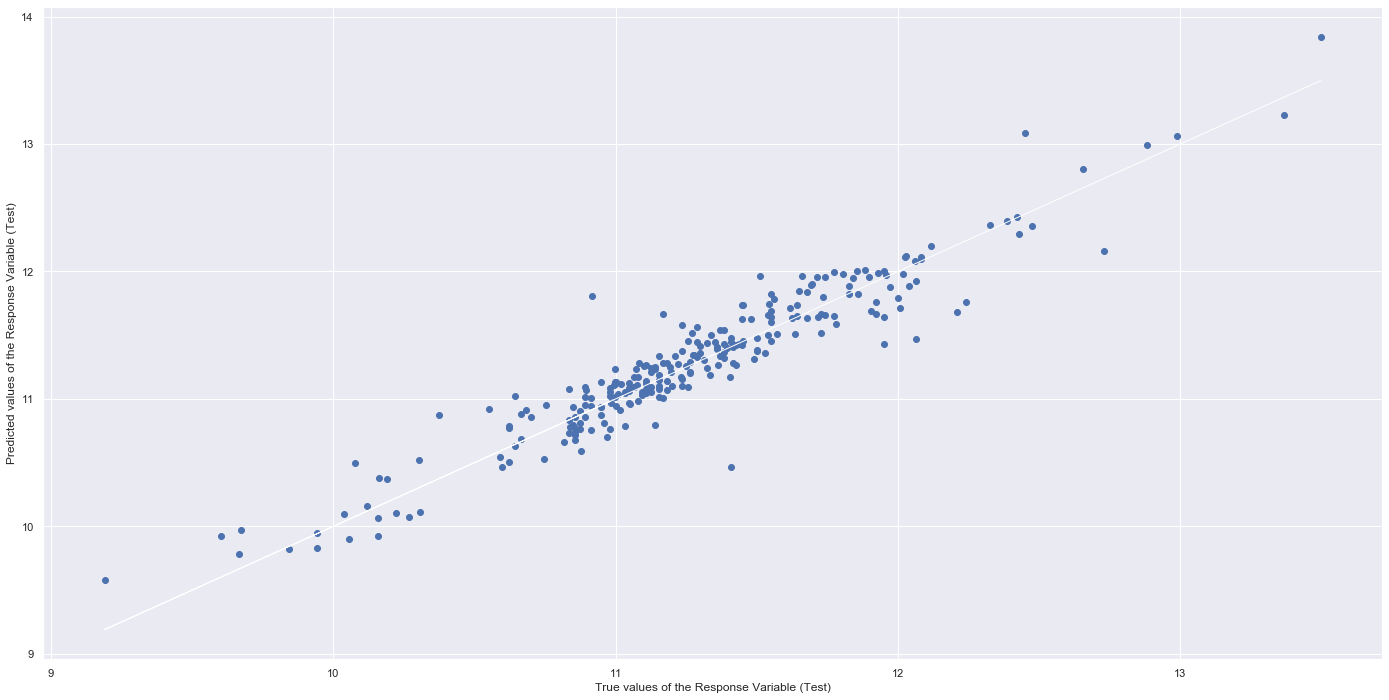

In [66]:
predictor = reality_check_concat.drop(columns='Price')
result = reality_check_concat['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
print("Accuracy/Explained variance \t:", linreg.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

In [67]:
test_sample = reality_check_concat.sample(n=10)
test_sample

,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Citroen,Brand_Daihatsu,Brand_Ferrari,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Type_Sports Car,Type_Stationwagon,Coe_left,Mileage,Engine Cap,Curb Weight,age,Transmission,No. of Owners,Price
900,0,0,0,0,0,0,0,0,0,0,...,0,0,1.116578,-1.215214,-0.514978,-0.221777,-1.109772,0.140525,-0.661109,11.694313
1059,0,1,0,0,0,0,0,0,0,0,...,1,0,-1.471490,0.192094,3.249217,1.458871,0.612932,0.140525,-0.661109,11.711776
245,0,0,0,0,0,1,0,0,0,0,...,0,0,-1.302628,0.953586,-0.649413,-1.100297,2.048520,0.140525,-0.661109,9.989665
175,0,0,0,0,0,0,0,0,0,0,...,1,0,0.937378,1.046756,3.046220,1.497068,1.761402,0.140525,2.822530,11.813030
2596,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.075794,0.245406,-0.243418,-0.527349,-0.248420,0.140525,-0.661109,11.074421
3283,0,0,0,0,0,0,0,0,0,0,...,0,0,1.525523,-1.463077,-0.868543,-0.298170,-1.396890,0.140525,-0.661109,11.855096
3703,0,0,0,0,0,0,0,0,0,0,...,0,0,0.312473,-0.417538,0.026798,-0.130105,-0.535537,0.140525,0.209801,11.231888
76,0,0,0,0,0,0,0,0,0,0,...,0,0,1.113132,-1.252305,0.022764,0.003583,-1.109772,0.140525,-0.661109,11.350407
408,0,0,0,0,0,0,0,0,0,0,...,0,0,0.691551,-0.197206,0.010665,0.465761,-0.535537,0.140525,-0.661109,11.540541
3083,0,0,0,0,0,0,0,0,0,0,...,0,0,0.372207,-0.812216,-0.648069,-1.562475,-0.535537,0.140525,-0.661109,10.700995


In [68]:
pred_test_sample = linreg.predict(test_sample.drop(columns='Price'))
pred_test_sample = pd.DataFrame(pred_test_sample, columns = ["PredPrice"], index = test_sample.index)
pred_full_price = pred_test_sample.apply(np.exp)


test_sample_price = pd.DataFrame(test_sample['Price'])
actual_full_price = test_sample_price.apply(np.exp)


pred_err = 100 * abs(test_sample_price['Price'] - pred_test_sample['PredPrice']) / test_sample_price['Price']
pred_err = pd.DataFrame(pred_err, columns = ["Error"], index = test_sample_price.index)


actual_pred_err = 100 * abs(actual_full_price['Price'] - pred_full_price['PredPrice']) / actual_full_price['Price']
actual_pred_err = pd.DataFrame(actual_pred_err, columns = ["Error"], index = test_sample_price.index)


price_cmp = pd.concat([test_sample_price, pred_test_sample, pred_err, actual_full_price, pred_full_price, actual_pred_err], axis=1)
price_cmp

,Price,PredPrice,Error,Price,PredPrice,Error
900,11.694313,11.905559,1.806397,119888.0,148087.553351,23.521581
1059,11.711776,11.953830,2.066754,122000.0,155411.218957,27.386245
245,9.989665,10.024250,0.346203,21800.0,22567.132366,3.518956
175,11.813030,12.168203,3.006623,135000.0,192567.742010,42.642772
2596,11.074421,11.019299,0.497739,64500.0,61040.859689,5.363008
3283,11.855096,12.002605,1.244267,140800.0,163179.290862,15.894383
3703,11.231888,11.277716,0.408017,75500.0,79040.523794,4.689435
76,11.350407,11.514150,1.442619,85000.0,100122.495695,17.791171
408,11.540541,11.471942,0.594418,102800.0,95984.459144,6.629904
3083,10.700995,10.871043,1.589088,44400.0,52630.074110,18.536203


# Conclusion 

 ## Prediction 
 
 With a 98% prediction for all three models is better than what we have expected. However there are issues with the data 
 
 set which causes our prediction to be bias. We explored what the prediction could be like with a more complete set of 
 
 features and what would be a more practical model used for people to predict a car's price using what information they 
 
 have. One surprising observation made was by knowing the deregistration value, one can predict the price almost as 
 
 accurately even without knowing most of the other features. This may be because the calculation of deregistration value 
 
 encompasses a few of the significant variables e.g. ARF, age and COE price and other type and brand of vehicle, causing 
 
 the deregistration value to be as significant as the combination of less-significant variables like mileage, transmission 
 
 and engine cap.
 
 
 ## Limitation 
 
1) Data size could have been larger, more importantly we need a greater variation of vehicle brand anf types. Right now most of the car models we have 
are luxury sedan vehicles which cause our prediction to center around this type of car.

2) Data cleaning, we were sort of forced to drop all our missing dataset as we feel that most of the infomation cannot can

be just replaced with mean median or mode of the data. Perhaps we can cross reference with other infomation from the web to 

get more information like VES (Vehicle Emission Scheme), Accurate open market value to fill in the data for ARF, Road Tax 

etc.

 
 ## Futher improvement
 
 1) We could explore the use of selenium to systematically filter and scrape the website for a more diversified dataset consisting of comparable number of types/brands of vehicles.
 
 2) We can try accessing government website like One Motoring and LTA for the updated and accurate information, including VES rebates, COE prices and OMV.